<a href="https://colab.research.google.com/github/Camila-Aroca/Camila-Aroca/blob/main/Entrega_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA - An√°lisis Exploratorio de Datos**

# **1. Business Understanding**

El Banco Monopoly es una instituci√≥n financiera que ofrece diversos productos a sus clientes: tarjetas de cr√©dito y d√©bito, cr√©ditos hipotecarios y de consumo, y cuentas corrientes. Tambi√©n dispone de banca web, aunque no todos los clientes la utilizan. En el segmento de tarjetas, los clientes pueden realizar compras y avances tanto nacionales como internacionales, lo que genera flujos de ingresos por comisiones, intereses y uso de cupos.

El dataset disponible se encuentra a nivel de cliente: cada fila representa a una persona e incluye datos de perfil (sexo, edad, renta, antig√ºedad), tenencia de productos (cuentas corrientes, cr√©ditos, uso de banca web), y comportamiento con tarjetas (n√∫mero de tarjetas, cupo total, transacciones, pagos, avances y compras). Este tipo de informaci√≥n permite comprender el perfil crediticio y los h√°bitos de consumo de los clientes, lo cual es clave para la gesti√≥n del riesgo y la rentabilidad bancaria.

En particular, el cupo asignado a las tarjetas de cr√©dito (espec√≠ficamente el CUPO_L1, correspondiente al monto m√°ximo disponible para compras nacionales) es un componente central en la pol√≠tica crediticia del banco. Determinar de forma √≥ptima este cupo es crucial: un monto demasiado bajo puede limitar el uso de la tarjeta y reducir las comisiones generadas, mientras que un monto demasiado alto aumenta el riesgo de incumplimiento o sobreendeudamiento.

Por ello, un modelo predictivo que permita estimar el cupo √≥ptimo para cada cliente podr√≠a mejorar significativamente el equilibrio entre rentabilidad y riesgo, al apoyar decisiones m√°s informadas en la asignaci√≥n de l√≠neas de cr√©dito.

## **1.1. Problema de negocio (qu√© queremos responder)**

El Banco Monopoly busca optimizar la asignaci√≥n de cupos de cr√©dito en sus tarjetas para equilibrar la rentabilidad con el control del riesgo financiero.
Actualmente, los cupos (CUPO_L1) se asignan mediante pol√≠ticas generales y criterios discretos (como renta o antig√ºedad), pero no existe un modelo anal√≠tico que prediga el monto m√°s adecuado seg√∫n el perfil integral del cliente.

La pregunta gu√≠a de este estudio es:

¬øQu√© factores determinan el monto del cupo de cr√©dito (CUPO_L1) que deber√≠a asignarse a un cliente?
y m√°s espec√≠ficamente,
¬øpodemos predecir el valor del cupo nacional √≥ptimo de una tarjeta de cr√©dito a partir de las caracter√≠sticas del cliente y su comportamiento financiero?

Responder esta pregunta permitir√° al banco:

Asignar cupos de manera m√°s personalizada y justa.

Identificar clientes con alto potencial de cr√©dito subasignados.

Reducir el riesgo crediticio derivado de cupos sobredimensionados.

Aumentar la eficiencia del proceso de aprobaci√≥n de tarjetas mediante predicciones automatizadas.

## **1.2. Justificaci√≥n del Target: TC (N√∫mero de Tarjetas de Cr√©dito)**

La variable CUPO_L1 representa el cupo de l√≠nea de cr√©dito nacional asignado a cada cliente.
Su selecci√≥n como variable objetivo se justifica tanto desde una perspectiva estrat√©gica de negocio como anal√≠tica.

Desde el punto de vista del negocio:

El cupo de cr√©dito es un indicador clave del poder adquisitivo y del nivel de confianza que el banco deposita en el cliente.

Determina el potencial de ingresos por comisiones, intereses y uso del cr√©dito.

Una asignaci√≥n m√°s precisa de cupos permite maximizar la rentabilidad sin comprometer la estabilidad del portafolio crediticio.

Desde el punto de vista anal√≠tico:

CUPO_L1 es una variable continua y num√©rica positiva, ideal para un enfoque de regresi√≥n supervisada.

Su relaci√≥n con otras variables (como Renta, Antiguedad, Cuentas, Dualidad, CUPO_MX y Adicional) puede capturar patrones financieros relevantes.

El an√°lisis de esta variable permitir√° identificar los factores m√°s influyentes en la determinaci√≥n del cupo, ofreciendo informaci√≥n valiosa para la toma de decisiones estrat√©gicas.

Por lo tanto, CUPO_L1 se selecciona como foco central del an√°lisis, ya que su predicci√≥n permite alinear los objetivos anal√≠ticos con los objetivos comerciales del banco, fortaleciendo tanto la gesti√≥n del riesgo como la rentabilidad.

## Fase 2: Data Understanding

En este primer bloque, importamos librer√≠as necesarias y tambi√©n creamos un dataframe que nos permita una vista r√°pida de los nombres de cada columna.

In [35]:
#Permite una vista r√°pida de nombres de cada columna

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 140)

FILE = "Base_clientes_Monopoly-0.csv"
df = pd.read_csv(FILE, low_memory=False, header=0) # Specify header=0

print("Dimensiones:", df.shape)
df.head(3)

Dimensiones: (51125, 575)


1          1.1   1.2     1.3   1.4     1.5         1.6         1.7        1.8       1.9          1.10    1.11     1.12         1.13  \
0  Id  Subsegmento  Sexo  Region  Edad   Renta  Antiguedad  Internauta  Adicional  Dualidad  Monoproducto  Ctacte  Consumo  Hipotecario   
1   1          160     M      13    43     NaN         130           1          1         0             0       1        0            0   
2   2          160     H      13    46  143640          69           1          0         0             0       1        0            1   

     1.14       1.15     1.16 1.17     1.18     1.19     1.20        1.21          1.22          1.23          1.24          1.25  \
0  Debito  CambioPin  Cuentas   TC  CUPO_L1  CUPO_L2  CUPO_MX  FlgAct_T12  FlgActCN_T12  FlgActCI_T12  FlgActAN_T12  FlgActAI_T12   
1       1        NaN        1    3   798000  1012000     1210           1             1             0             0             0   
2       0        NaN        1    1   750000   150000     1000           1             1             0             0             0   

            1.26            1.27            1.28           1.29     1.30     1.31       1.32       1.33       1.34       1.35       1.36  \
0  FlgActPAT_T12  FlgActCCPC_T12  FlgActCCOT_T12  FlgActCOL_T12  Fac_T12  Txs_T12  FacCN_T12  TxsCN_T12  FacCI_T12  TxsCI_T12  FacAN_T12   
1              0               1               0              0    55490        3      55490          3          0          0          0   
2              0               1               0              0    19813        1      19813          1          0          0          0   

        1.37       1.38       1.39        1.40        1.41         1.42         1.43         1.44         1.45        1.46        1.47  \
0  TxsAN_T12  FacAI_T12  TxsAI_T12  FacPAT_T12  TxsPAT_T12  FacCCPC_T12  TxsCCPC_T12  FacCCOT_T12  TxsCCOT_T12  FacCOL_T12  TxsCOL_T12   
1          0          0          0           0           0        25890            1            0            0           0           0   
2          0          0          0           0           0        19813            1            0            0           0           0   

            1.48           1.49           1.50           1.51     1.52         1.53         1.54         1.55         1.56         1.57  \
0  FacDebCom_T12  TxsDebCom_T12  FacDebAtm_T12  TxsDebAtm_T12  Col_T12  ColL1T0_T12  ColL1TE_T12  ColL2T0_T12  ColL2AC_T12  ColL2CC_T12   
1         247982             30          70000              6   675198            0       675198            0            0            0   
2              0              0              0              0   370529        10000        82504       278025            0            0   

        1.58         1.59  ...        1.515        1.516        1.517      1.518        1.519        1.520        1.521        1.522  \
0  ColMx_T12  PagoNac_T12  ...  ColL2T0_T02  ColL2AC_T02  ColL2CC_T02  ColMx_T02  PagoNac_T02  PagoInt_T02  EeccNac_T02  EeccInt_T02   
1          0        22000  ...            0            0        43696          0        33000            0      1072040            0   
2          0       250000  ...         4764            0            0          0        14000            0       462736            0   

       1.523      1.524      1.525       1.526       1.527         1.528         1.529         1.530         1.531          1.532  \
0  UsoL1_T02  UsoL2_T02  UsoLI_T02  IndRev_T02  FlgAct_T01  FlgActCN_T01  FlgActCI_T01  FlgActAN_T01  FlgActAI_T01  FlgActPAT_T01   
1    1072040      29396          0           R           0             0             0             0             0              0   
2     462736       9529          0           R           1             1             0             0             0              0   

            1.533           1.534          1.535    1.536    1.537      1.538      1.539      1.540      1.541      1.542      1.543  \
0  FlgActCCPC_T01  FlgActCCOT


## 2.1. Clasificaci√≥n de variables para Data Understanding (CRISP-DM)

A continuaci√≥n se separan las variables del dataset **Banco Monopoly** en **categ√≥ricas** y **num√©ricas**, separ√°ndolas en subtipos cuando corresponda.
---

## 1) Variables categ√≥ricas

Se refiere a aquellas que indican una clasificaci√≥n o pertenencia a una cierta categor√≠a o grupo en oposici√≥n a variables num√©ricas que indican una magnitud medible.

Dentro de las variables categ√≥ricas, identificamos variables nominales, binarias y ordinales.

### 1.1 Nominales
Se refiere a quellas que tienen 2 o m√°s categor√≠as que no son indicativas de alguna jerarqu√≠a.

* **Region** (regi√≥n de residencia)
* **Subsegmento**

### 1.2 Binarias 0/1 (indicadores de tenencia/uso)
Se refiere a variables categ√≥ricas que s√≥lo tienen 2 resultados posibles.

* **Sexo**
* **Adicional** (tiene Tarjetas de cr√©dito -TC- adicionales)
* **Consumo** (tiene cr√©dito de consumo)
* **Debito** (tiene tarjeta de d√©bito)
* **Ctacte** (tiene cuenta corriente)
* **Hipotecario** (tiene cr√©dito hipotecario)
* **Internauta** (usa la web del banco)
* **Monoproducto** (solo posee una TC)
* **Dualidad** (tiene ‚â•2 TC)
* **CambioPin** (realiz√≥ cambio de clave) ‚Äî *En este caso, las opciones posibles en esta variable son NULL si no ha cambiado la clave, y 1 si la ha cambiado-*


### 1.3 Variable correlativo

* **CORRELATIVO** (ID de cliente) En este caso, la identificamos como una variable nominal, pero consideramos que cabe mencionarla por separado dado que tiene valores √∫nicos, ya que cumple el rol de identificador.

---

## 2) Variables num√©ricas

Se refiere a las que expresan una cantidad o medida cuantificable. Se subdividen entre continuas (pueden tomar cualquier valor dentro de un rango) y discretas, que s√≥lo pueden tomar valores enteros espec√≠ficos.


### 2.1 Conteos/enteras (discretas)

* **TC** (n√∫mero de tarjetas de cr√©dito)
* **Cuentas** (n√∫mero de cuentas)
* **Txs\_T12**, **TxsAI\_T12**, **TxsAN\_T12**, **TxsCCOT\_T12**, **TxsCCPC\_T12**, **TxsCI\_T12**, **TxsCN\_T12**, **TxsCOL\_T12**, **TxsDebAtm\_T12**, **TxsDebCom\_T12**, **TxsPAT\_T12** (n√∫mero de transacciones por tipo en el mes X)
* **FlgAct\_T12**, **FlgActAI\_T12**, **FlgActAN\_T12**, **FlgActCCOT\_T12**, **FlgActCCPC\_T12**, **FlgActCI\_T12**, **FlgActCN\_T12**, **FlgActCOL\_T12**, **FlgActPAT\_T12** (suma de meses activos por tipo)

Si bien las 2 variables siguientes (Edad y antiguedad) en otros contextos pueden tratarse como continuas, en el caso en estudio, las mismas se representan como variables que s√≥lo pueden n√∫meros enteros espec√≠ficos, por lo que para el contexto de Monopoly las consideramos enteras.

* **Edad** (a√±os)
* **Antiguedad** (meses de relaci√≥n)


### 2.2 Continuas
* **Renta** (ingreso del cliente)
* **CUPO\_L1** (l√≠mite de compras nacionales)
* **CUPO\_MX** (l√≠mite compras internacionales)
* **CUPO\_L2** (l√≠mite para avances en cuotas)
* **Col\_T12**, **ColL1TE\_T12** (colocaci√≥n/revolving)
* **EeccInt\_T12**, **EeccNac\_T12** (monto exigido en estado de cuenta; *puede ser negativo por ajustes/saldos a favor*).
* **Fac\_T12** (total facturado TC, si aplica) y desgloses:
  **FacAI\_T12**, **FacAN\_T12**, **FacCCOT\_T12**, **FacCCPC\_T12**, **FacCI\_T12**, **FacCN\_T12**, **FacCOL\_T12** (montos por tipo de transacci√≥n en TC).
* **FacDebAtm\_T12**, **FacDebCom\_T12** (montos en TD).
* **FacPAT\_T12** (monto en PAT).
* **PagoInt\_T12**, **PagoNac\_T12** (pagos realizados).
* **UsoL1\_T12**, **UsoL2\_T12**, **UsoLI\_T12** (deuda/utilizaci√≥n por l√≠nea; *pueden aparecer negativos*).

### Resumen

* **Categ√≥ricas**: `Region`, `Sexo`, `Subsegmento`, y todos los **indicadores 0/1** (Internauta, Ctacte, Debito, Consumo, Hipotecario, Monoproducto, Adicional, Dualidad, CambioPin).
* **Num√©ricas (demogr√°ficas/capacidad/uso)**: `Edad`, `Antiguedad`, `Renta`, `CUPO_*`, `TC`, `Cuentas`, `Txs_*`, `FlgAct_*`, `Eecc_*`, `Fac*`, `Pago*`, `Uso*`.
* **ID**: `CORRELATIVO`

Esta clasificaci√≥n gu√≠a el **EDA** (qu√© gr√°ficos/estad√≠sticos usar) y el **preprocesamiento** (imputaci√≥n, codificaci√≥n, transformaciones, escalado) previo a la siguiente fase de CRISP-DM.


## 2.2. An√°lisis de Distribuci√≥n de Variables:

En esta etapa se realiz√≥ un an√°lisis exploratorio con el fin de comprender la estructura y comportamiento general del dataset, as√≠ como la distribuci√≥n de los clientes seg√∫n diferentes variables demogr√°ficas y financieras. Se exploraron caracter√≠sticas como el sexo, los rangos etarios y el nivel de renta, buscando identificar posibles patrones o concentraciones dentro de la base de clientes.

### 2.2.1. Conclusi√≥n:

El an√°lisis exploratorio inicial muestra que la base de clientes del Banco Monopoly est√° compuesta de forma equilibrada en t√©rminos de g√©nero, con una ligera mayor√≠a de mujeres (‚âà54%) respecto a hombres (‚âà46%).

En cuanto a la edad, se observa una fuerte concentraci√≥n en los segmentos j√≥venes y adultos j√≥venes, particularmente entre los 20 y 39 a√±os, que en conjunto representan la mayor parte de la cartera. A medida que aumenta la edad, la cantidad de clientes disminuye de forma progresiva, lo que sugiere una base predominantemente activa en etapas de consolidaci√≥n laboral y financiera.

Respecto al nivel de renta, la mayor√≠a de los clientes se ubica en los tramos inferiores a 1 mill√≥n de CLP mensuales, con una ca√≠da pronunciada en los segmentos de mayores ingresos. Esto indica que el banco posee una cartera con predominancia de clientes de ingresos medios y medios-bajos, alineada con el perfil de la banca masiva.

En conjunto, estos resultados permiten comprender el perfil general del cliente t√≠pico, sin entrar a√∫n en distinciones m√°s espec√≠ficas como productos financieros o comportamiento de pago.

/tmp/ipython-input-1707152415.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='1.2', data=df_sexo, palette='pastel')


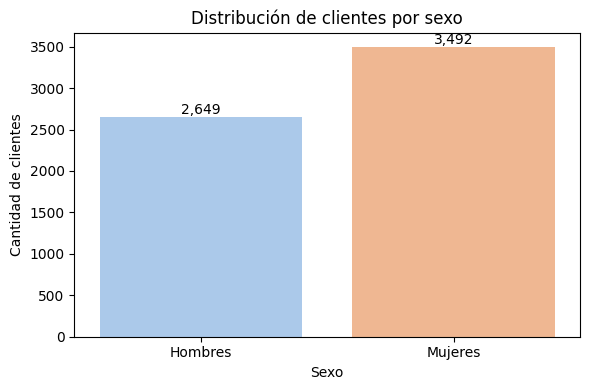

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo H y M v√°lidos en la columna de sexo
df_sexo = df[df['1.2'].isin(['H', 'M'])]

# Gr√°fico de barras
plt.figure(figsize=(6,4))
sns.countplot(x='1.2', data=df_sexo, palette='pastel')

# Etiquetas
plt.title('Distribuci√≥n de clientes por sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de clientes')
plt.xticks(ticks=[0,1], labels=['Hombres', 'Mujeres'])

# Mostrar cantidades sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


/tmp/ipython-input-358860958.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edad['rango_edad'] = pd.cut(df_edad['1.4'], bins=bins, labels=labels, right=False, include_lowest=True)
/tmp/ipython-input-358860958.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_edades.index, y=conteo_edades.values, palette='viridis')


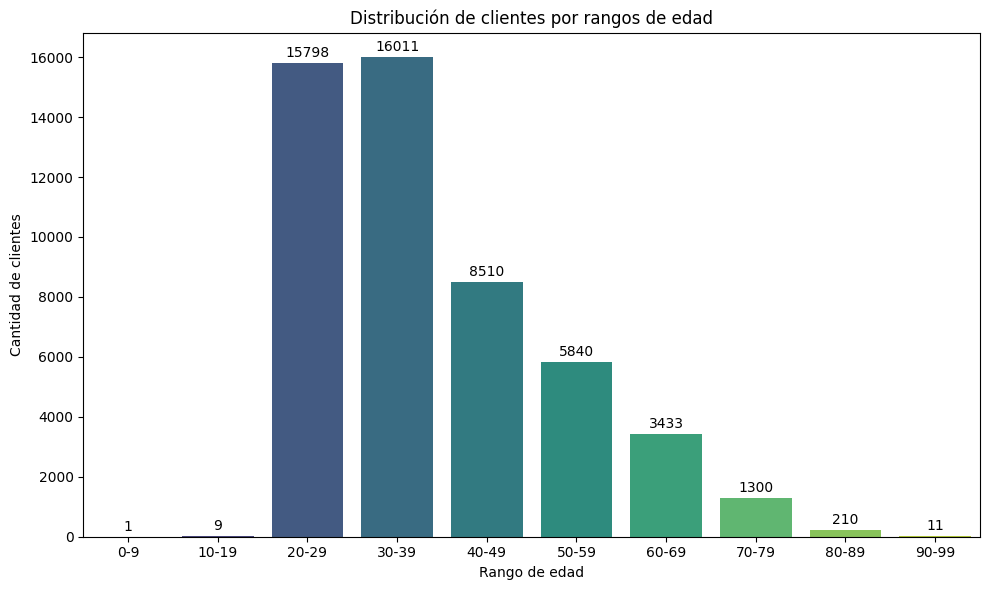

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna de edad est√© en formato num√©rico
df['1.4'] = pd.to_numeric(df['1.4'], errors='coerce')

# Eliminar filas con edad nula
df_edad = df[df['1.4'].notna()]

# Crear rangos de edad desde 0 hasta 105 (incluye 104)
bins = list(range(0, 106, 10))  # Rangos de 10 en 10: [0,10), [10,20), ..., [100,110)
labels = [f'{i}-{i+9}' for i in bins[:-1]]
df_edad['rango_edad'] = pd.cut(df_edad['1.4'], bins=bins, labels=labels, right=False, include_lowest=True)

# Contar clientes por rango
conteo_edades = df_edad['rango_edad'].value_counts().sort_index()

# Gr√°fico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_edades.index, y=conteo_edades.values, palette='viridis')

# Etiquetas
plt.title('Distribuci√≥n de clientes por rangos de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad de clientes')

# Mostrar n√∫meros sobre las barras
for i, value in enumerate(conteo_edades.values):
    plt.text(i, value + 100, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Dimensiones: (51125, 575)
Primeras columnas: ['1', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9']


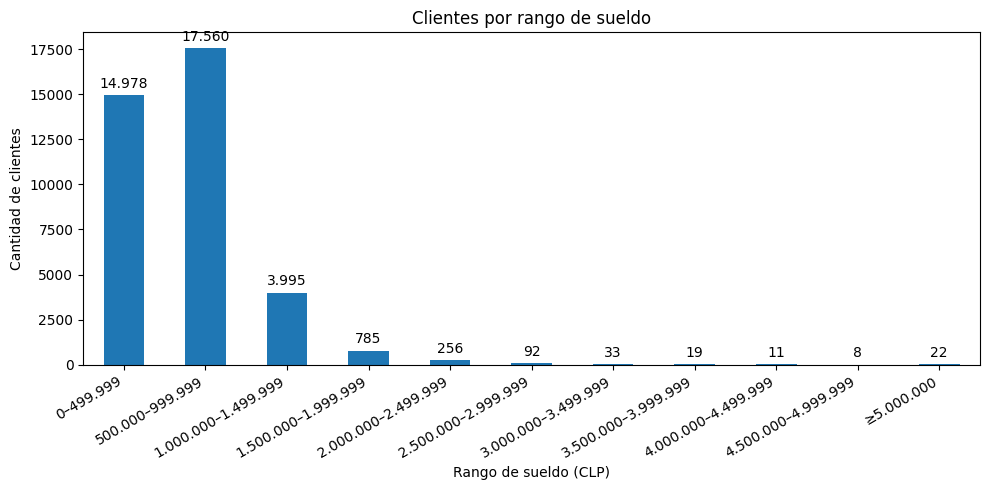

Gr√°fico guardado en: clientes_por_rango_sueldo.png
Conteo por rango guardado en: conteo_por_rango.csv
1.5
0‚Äì499.999              14978
500.000‚Äì999.999        17560
1.000.000‚Äì1.499.999     3995
1.500.000‚Äì1.999.999      785
2.000.000‚Äì2.499.999      256
2.500.000‚Äì2.999.999       92
3.000.000‚Äì3.499.999       33
3.500.000‚Äì3.999.999       19
4.000.000‚Äì4.499.999       11
4.500.000‚Äì4.999.999        8
‚â•5.000.000                22
Name: count, dtype: int64


In [37]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Tu carga original ---
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 140)

FILE = "Base_clientes_Monopoly-0.csv"
df = pd.read_csv(FILE, low_memory=False, header=0)

print("Dimensiones:", df.shape)
print("Primeras columnas:", list(df.columns)[:10])  # ayuda r√°pida

# === Par√°metros ===
COL_NAME = "1.5"            # <- columna de sueldo
STEP = 500_000              # tama√±o de cada rango
MAX_SALARY = 5_000_000      # tope expl√≠cito (habr√° un bin ‚â• MAX_SALARY)
TITLE = "Clientes por rango de sueldo"

# === Funciones auxiliares ===
def build_salary_bins(step=STEP, max_salary=MAX_SALARY):
    # bins: [0, 500k], [500k, 1M], ..., [4.5M, 5M], [‚â•5M]
    edges = list(range(0, max_salary + step, step)) + [math.inf]
    labels = []
    for i in range(len(edges) - 2):
        lo = edges[i]
        hi = edges[i+1] - 1  # solo para mostrar legible
        labels.append(f"{lo:,}‚Äì{hi:,}".replace(",", "."))
    labels.append(f"‚â•{max_salary:,}".replace(",", "."))
    return edges, labels

def parse_chilean_number_series(series):
    """
    Convierte strings con formato chileno (puntos de miles, coma decimal) a float.
    Tambi√©n maneja enteros/float ya num√©ricos. Devuelve serie float con NaN donde no se pudo convertir.
    """
    s = series.astype(str).str.strip()
    # Quitar separador de miles "." y cambiar coma decimal a punto
    s = s.str.replace(".", "", regex=False).str.replace(",", ".", regex=False)
    return pd.to_numeric(s, errors="coerce")

# === Validaciones b√°sicas ===
if COL_NAME not in df.columns:
    raise ValueError(
        f"La columna '{COL_NAME}' no existe. Cols disponibles (primeras 20): {list(df.columns)[:20]}"
    )

# === Limpieza y preparaci√≥n ===
# 1) Convertir a num√©rico (soporta formatos con . y ,), 2) excluir nulos, 3) forzar no negativos
s = parse_chilean_number_series(df[COL_NAME]).dropna()
s = s.clip(lower=0)

# === Construir bins y discretizar ===
bins, labels = build_salary_bins()
cats = pd.cut(s, bins=bins, labels=labels, include_lowest=True, right=True)

# === Conteos por rango (incluye bins sin datos con 0) ===
counts = cats.value_counts().reindex(labels, fill_value=0)

# === Gr√°fico ===
plt.figure(figsize=(10, 5))
ax = counts.plot(kind="bar")
ax.set_title(TITLE)
ax.set_xlabel("Rango de sueldo (CLP)")
ax.set_ylabel("Cantidad de clientes")
plt.xticks(rotation=30, ha="right")

# Etiquetas encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height):,}".replace(",", "."),
                (p.get_x() + p.get_width() / 2, height),
                ha="center", va="bottom", xytext=(0, 3),
                textcoords="offset points")

plt.tight_layout()
plt.savefig("clientes_por_rango_sueldo.png", dpi=150, bbox_inches="tight")
plt.show()

# === Exportar tabla de conteo (opcional) ===
counts.rename_axis("rango_sueldo").reset_index(name="clientes").to_csv("conteo_por_rango.csv", index=False)

print("Gr√°fico guardado en: clientes_por_rango_sueldo.png")
print("Conteo por rango guardado en: conteo_por_rango.csv")
print(counts)


## 2.3. An√°lisis exploratorio centrado en CUPO_L1

### Definici√≥n de variables

Luego de una vista general de algunas de las variables m√°s relevantes para identificar si hay diferencias notorias entre grupos demogr√°ficos dentro del banco, nos enfocaremos en nuestro target, CUPO_L1, partiendo por determinar con cu√°les variables tiene m√°s correlaci√≥n

üìà Top 10 variables m√°s correlacionadas con CUPO_L1:


0
CUPO_L1       1.000000
CUPO_MX       0.768104
Antiguedad    0.477625
TC            0.402561
Cuentas       0.399050
Dualidad      0.382276
Adicional     0.133344
Name: CUPO_L1, dtype: float64

/tmp/ipython-input-928123277.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="crest")


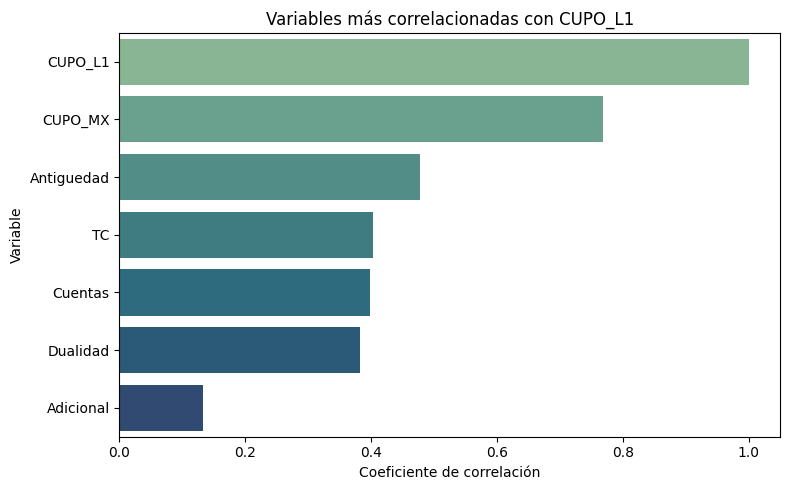

In [38]:
# ======================================
# üîç An√°lisis de correlaci√≥n con CUPO_L1
# ======================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que las columnas sean num√©ricas
df_numeric = df_clean.select_dtypes(include=['int64', 'float64']).copy()

# Calcular la matriz de correlaci√≥n
corr_matrix = df_numeric.corr(numeric_only=True)

# Correlaci√≥n de todas las variables con CUPO_L1
corr_with_cupo = corr_matrix['CUPO_L1'].sort_values(ascending=False)

# Mostrar top 10
top_corr = corr_with_cupo.head(10)
print("üìà Top 10 variables m√°s correlacionadas con CUPO_L1:")
display(top_corr)

# --- Visualizaci√≥n ---
plt.figure(figsize=(8, 5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="crest")
plt.title("Variables m√°s correlacionadas con CUPO_L1")
plt.xlabel("Coeficiente de correlaci√≥n")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


- CUPO_MX (0.768) presenta la correlaci√≥n m√°s alta con CUPO_L1. Esto resulta l√≥gico, ya que ambos indicadores miden diferentes dimensiones del mismo concepto ‚Äî el nivel de cr√©dito autorizado al cliente. Mientras que CUPO_L1 se refiere al cupo disponible para compras nacionales, CUPO_MX representa el l√≠mite total de cr√©dito o el m√°ximo cupo autorizado.
Esta alta correlaci√≥n confirma que ambos est√°n estrechamente vinculados y que CUPO_MX puede actuar como un predictor relevante en el modelo.

- Antiguedad (0.478) muestra una correlaci√≥n positiva moderada: los clientes con m√°s a√±os de relaci√≥n con el banco tienden a recibir cupos mayores, lo que refleja la confianza acumulada y la estabilidad crediticia que el banco otorga a clientes de larga data.

- TC (0.403), Cuentas (0.399) y Dualidad (0.382) tambi√©n presentan correlaciones positivas, aunque m√°s moderadas. Esto sugiere que los clientes con m√°s productos bancarios o m√°s de una tarjeta tienden a obtener cupos m√°s altos, probablemente debido a su mayor nivel de vinculaci√≥n y experiencia financiera con la instituci√≥n.

- Finalmente, Adicional (0.133) tiene una correlaci√≥n d√©bil, lo que indica que la existencia de tarjetas adicionales no parece tener una influencia significativa en la asignaci√≥n del cupo principal.

En conjunto, estos resultados muestran que las variables con mayor poder explicativo sobre el cupo de cr√©dito est√°n asociadas principalmente con el historial y nivel de vinculaci√≥n del cliente (Antiguedad, Cuentas, Dualidad) y con otros l√≠mites de cr√©dito previamente otorgados (CUPO_MX).

### Heatmap: correlaciones de CUPO_L1 con otras variables


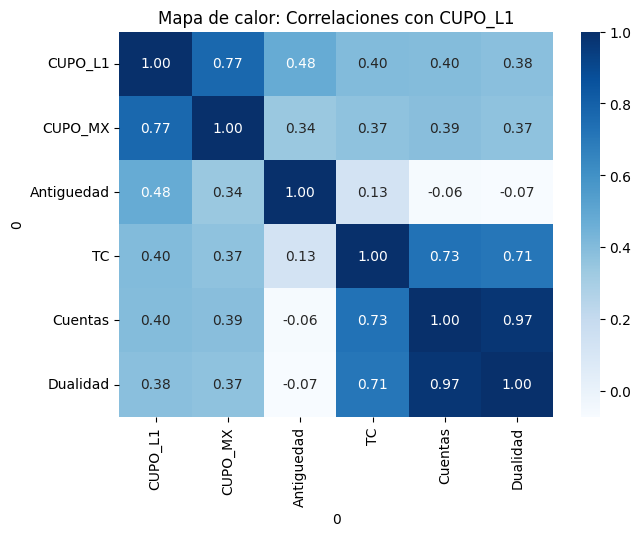

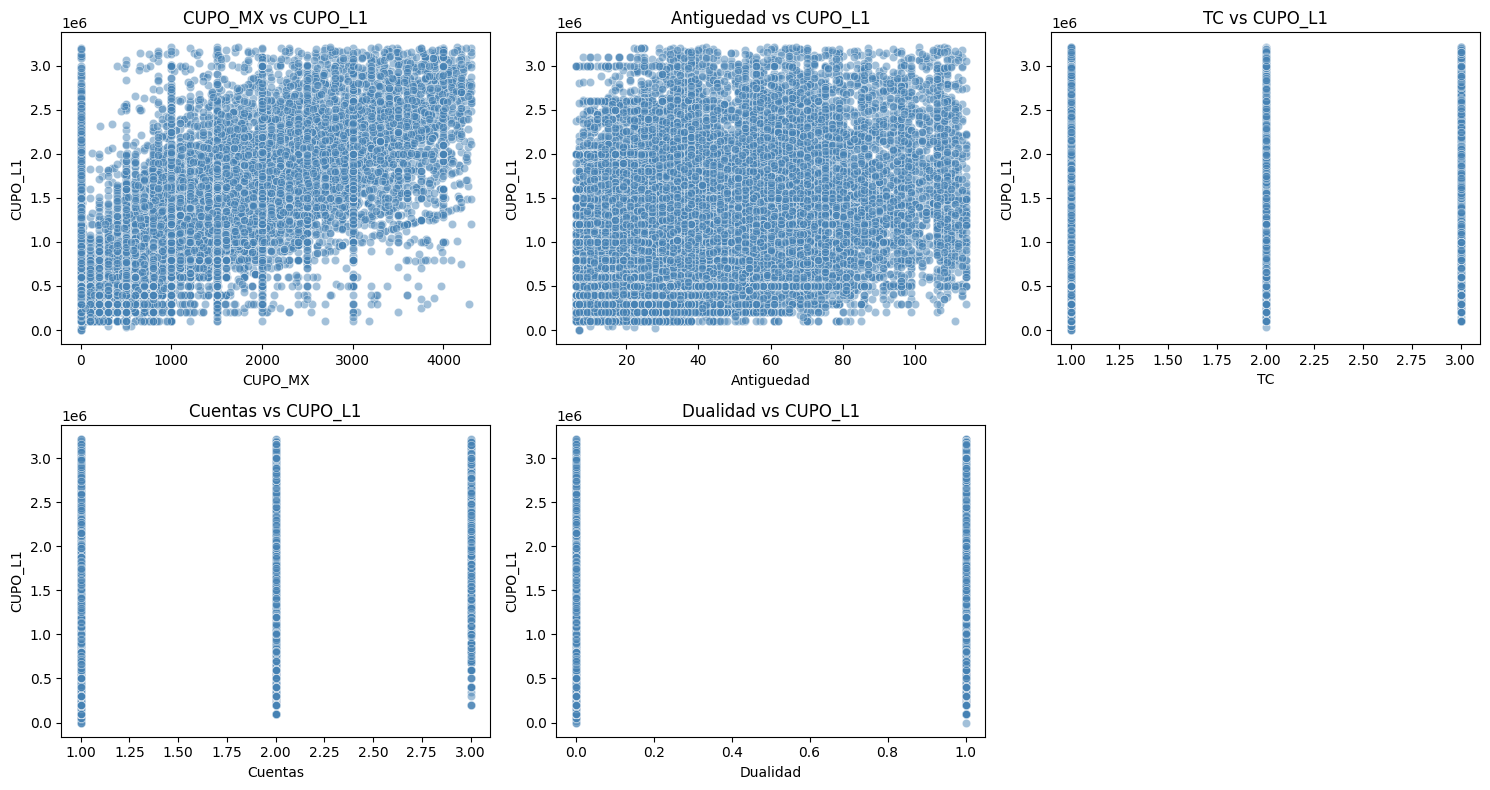

In [39]:
# ======================================
# üé® Visualizaci√≥n de correlaciones con CUPO_L1
# ======================================

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las variables m√°s correlacionadas
top_corr_vars = ['CUPO_MX', 'Antiguedad', 'TC', 'Cuentas', 'Dualidad']

# --- 1Ô∏è‚É£ Heatmap de correlaciones ---
plt.figure(figsize=(7, 5))
sns.heatmap(df_clean[['CUPO_L1'] + top_corr_vars].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Mapa de calor: Correlaciones con CUPO_L1")
plt.show()

# --- 2Ô∏è‚É£ Gr√°ficos de dispersi√≥n ---
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, var in enumerate(top_corr_vars):
    sns.scatterplot(data=df_clean, x=var, y='CUPO_L1', alpha=0.5, ax=axes[i], color='steelblue')
    axes[i].set_title(f'{var} vs CUPO_L1')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('CUPO_L1')

# Eliminar eje vac√≠o si sobran subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# üß∞ 3. Data Preparation

En esta fase del proceso **CRISP-DM**, el objetivo es preparar los datos para el modelado, garantizando que se encuentren **limpios, consistentes y representativos**.  
Un modelo predictivo es tan robusto como la calidad de los datos que lo alimentan; por ello, esta etapa se centra en **detectar y corregir posibles problemas** como valores faltantes, errores de registro y valores at√≠picos (*outliers*), as√≠ como en escalar o transformar las variables seg√∫n sea necesario.

En este caso, el conjunto de variables seleccionadas para modelar el **cupo de cr√©dito nacional (`CUPO_L1`)** son aquellas que previamente mostraron mayor correlaci√≥n con el target:  
`['CUPO_MX', 'Antiguedad', 'TC', 'Cuentas', 'Dualidad', 'Adicional']`.

---

## **3.1. An√°lisis de valores faltantes y outliers**

Antes de construir los modelos, es necesario evaluar la **completitud y consistencia de las variables predictoras**.  
Por ello, en esta etapa realizaremos dos an√°lisis clave:

1Ô∏è‚É£ **Detecci√≥n de valores nulos (NaN):**  
   - Determinar qu√© proporci√≥n de los datos presenta informaci√≥n faltante.  
   - Identificar si la ausencia de datos sigue un patr√≥n o es aleatoria.  
   - Definir el m√©todo de imputaci√≥n m√°s adecuado (por ejemplo, KNN Imputer).

2Ô∏è‚É£ **Detecci√≥n de outliers mediante IQR (Rango Intercuartil):**  
   - Identificar observaciones extremas que podr√≠an distorsionar los resultados del modelo.  
   - Evaluar si deben eliminarse o conservarse seg√∫n su relevancia.  
   - Aplicar t√©cnicas robustas para reducir su influencia sin eliminar informaci√≥n valiosa.

Estos pasos permitir√°n avanzar hacia un dataset m√°s confiable y estable, optimizando la capacidad del modelo de regresi√≥n para generalizar correctamente.

---


## 3.1.1. Deteccion de nulos

In [44]:
# ======================================
# üîç 3.1.1 Detecci√≥n de valores nulos
# ======================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1Ô∏è‚É£ Cargar correctamente los nombres de columnas ---
# La primera fila (fila 0) tiene los nombres num√©ricos
# La segunda fila (fila 1) tiene los nombres reales
df = pd.read_csv("Base_clientes_Monopoly-0.csv", low_memory=False, header=[0,1])

# Tomamos los nombres reales (segunda fila del encabezado)
df.columns = df.columns.get_level_values(1)

# Eliminamos la primera fila (que conten√≠a los nombres num√©ricos)
df = df.iloc[1:].reset_index(drop=True)

print("‚úÖ Columnas correctamente cargadas:")
print(df.columns.tolist()[:20])  # muestra las primeras 20 columnas

# --- 2Ô∏è‚É£ Seleccionar variables relevantes ---
features = ['CUPO_L1', 'CUPO_MX', 'Antiguedad', 'TC', 'Cuentas', 'Dualidad', 'Adicional']
df_nulls = df[features].copy()

# --- 3Ô∏è‚É£ C√°lculo de valores nulos ---
null_counts = df_nulls.isnull().sum()
null_percent = (null_counts / len(df_nulls)) * 100

null_summary = pd.DataFrame({
    'Valores nulos': null_counts,
    'Porcentaje (%)': null_percent.round(2)
}).sort_values(by='Porcentaje (%)', ascending=False)

print("\nüìã Resumen de valores nulos en variables seleccionadas:")
display(null_summary)



‚úÖ Columnas correctamente cargadas:
['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2']

üìã Resumen de valores nulos en variables seleccionadas:


Valores nulos  Porcentaje (%)
CUPO_L1                 0             0.0
CUPO_MX                 0             0.0
Antiguedad              0             0.0
TC                      0             0.0
Cuentas                 0             0.0
Dualidad                0             0.0
Adicional               0             0.0

### 3.1.2. Tratamiento de nulos con KNNImputer
Si bien no hay nulos en ninguna de nuestras variables predictoras seleccionadas, aplicamos KNN a Renta por ser una de las variables con m√°s nulos.

In [45]:
# üîß KNNImputer para imputar SOLO la columna 'Renta' (la √∫nica que consideramos utilizar que tiene nulos
# y por tanto la √∫nica que se puede imputar)
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# 1) Columnas num√©ricas de contexto para calcular distancias
context_cols = ['Edad', 'Antiguedad', 'CUPO_L1', 'CUPO_MX', 'TC', 'Cuentas', 'Dualidad']
cols_needed = ['Renta'] + [c for c in context_cols if c in df.columns]

# Forzar a num√©ricas (sin romper el resto del df)
X_knn = df[cols_needed].apply(pd.to_numeric, errors='coerce')

# Indicador de nulos en Renta
renta_na = X_knn['Renta'].isna()

# 2) Configurar el imputador KNN
imputer = KNNImputer(
    n_neighbors=5,
    weights='distance',
    metric='nan_euclidean'
)

# 3) Ajustar y transformar SOLO la matriz de trabajo (Renta + contexto)
X_imputed = pd.DataFrame(
    imputer.fit_transform(X_knn),
    columns=X_knn.columns,
    index=X_knn.index
)

# 4) Reemplazar √∫nicamente los nulos de 'Renta' en el df original
df['Renta_was_na'] = renta_na.astype(int)  # opcional: indicador de ‚Äúfalt√≥ Renta‚Äù
df.loc[renta_na, 'Renta'] = X_imputed.loc[renta_na, 'Renta']

# 5) Reporte r√°pido
n_imputed = renta_na.sum()
pct_imputed = 100 * n_imputed / len(df)
print(f"‚úÖ KNNImputer aplicado a 'Renta' con {imputer.n_neighbors} vecinos (weights='{imputer.weights}').")
print(f"üß© Valores imputados en Renta: {n_imputed} filas ({pct_imputed:.2f}%).")
print("üîé Chequeo nulos post-imputaci√≥n en Renta:", df['Renta'].isna().sum())


‚úÖ KNNImputer aplicado a 'Renta' con 5 vecinos (weights='distance').
üß© Valores imputados en Renta: 13364 filas (26.14%).
üîé Chequeo nulos post-imputaci√≥n en Renta: 0


## 3.1.2 Detecci√≥n de outliers

In [47]:
# ======================================
# üîé Detecci√≥n de outliers con IQR (solo conteos/%)
# ======================================
import pandas as pd

# Variables a evaluar (ajusta si corresponde)
vars_iqr = ['CUPO_L1', 'CUPO_MX', 'Antiguedad', 'TC', 'Cuentas', 'Dualidad', 'Adicional']

# Subconjunto num√©rico
df_num = df[vars_iqr].apply(pd.to_numeric, errors='coerce')

# C√°lculo IQR por columna
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# M√°scara de outlier por variable
outlier_mask_per_var = (df_num.lt(lower)) | (df_num.gt(upper))

# Conteo por variable
outliers_count = outlier_mask_per_var.sum().sort_values(ascending=False)
outliers_pct = (outliers_count / len(df_num) * 100).round(2)
resumen_vars = pd.DataFrame({'# outliers': outliers_count, '% del total': outliers_pct})

# Conteo global (al menos un outlier en alguna variable)
rows_with_any_outlier = outlier_mask_per_var.any(axis=1).sum()
pct_rows_with_any = round(rows_with_any_outlier / len(df_num) * 100, 2)

print("üìã Outliers por variable (IQR):")
display(resumen_vars)

print(f"üßÆ Filas con ‚â•1 outlier en cualquier variable: {rows_with_any_outlier} / {len(df_num)} "
      f"({pct_rows_with_any}%)")


üìã Outliers por variable (IQR):


# outliers  % del total
CUPO_MX           2756         5.39
Antiguedad        2669         5.22
TC                2460         4.81
CUPO_L1           2448         4.79
Cuentas            109         0.21
Dualidad             0         0.00
Adicional            0         0.00

üßÆ Filas con ‚â•1 outlier en cualquier variable: 7298 / 51123 (14.28%)


### Tratamiento de Outliers

In [48]:
# ======================================
# üßΩ Tratamiento por IQR: filtrar filas outlier
# ======================================
# Reutiliza df_num, lower, upper y outlier_mask_per_var del bloque anterior

# Filas a conservar (sin outliers en ninguna variable)
mask_keep = ~outlier_mask_per_var.any(axis=1)
df_iqr_clean = df.loc[mask_keep].copy()  # mantiene todas las columnas del df original

n_before = len(df)
n_after = len(df_iqr_clean)
pct_keep = round(n_after / n_before * 100, 2)

print(f"‚úÖ Filtrado IQR aplicado.")
print(f"   Filas conservadas: {n_after} / {n_before} ({pct_keep}%)")
print("   Usa `df_iqr_clean` para los pasos siguientes (imputaci√≥n/escalado/modelado).")


‚úÖ Filtrado IQR aplicado.
   Filas conservadas: 43825 / 51123 (85.72%)
   Usa `df_iqr_clean` para los pasos siguientes (imputaci√≥n/escalado/modelado).


### Justificaci√≥n del uso de IQR para detecci√≥n de outliers

Se utiliz√≥ el m√©todo del **Rango Intercuart√≠lico (IQR)** para detectar valores at√≠picos (*outliers*) en las variables num√©ricas.  
El IQR representa la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de una distribuci√≥n, es decir, el rango donde se concentra el 50% central de los datos.  

Los valores que se encuentran **por debajo de Q1 - 1.5√óIQR o por encima de Q3 + 1.5√óIQR** se consideran at√≠picos, ya que se alejan significativamente del comportamiento general de la muestra.

Este m√©todo fue elegido porque:
- **No depende de medidas de tendencia central** (como la media o la desviaci√≥n est√°ndar), lo que lo hace m√°s robusto ante distribuciones no normales.  
- **Preserva la estructura original de los datos**, eliminando solo observaciones extremas que podr√≠an sesgar el modelo.  
- **Es apropiado para datos financieros**, donde los valores extremos pueden surgir por errores de registro o por casos poco representativos.

En resumen, el uso del **IQR permite limpiar los datos de manera objetiva y estad√≠sticamente s√≥lida**, mejorando la estabilidad y generalizaci√≥n de los modelos de regresi√≥n posteriores.


## 3.2. Escalamiento


In [52]:
# ======================================
# ‚öñÔ∏è Escalamiento con StandardScaler (solo variables continuas)
# ======================================

from sklearn.preprocessing import StandardScaler
import pandas as pd

# Variables continuas a escalar, no se escalan las variables binarias
features_to_scale = ['CUPO_L1', 'CUPO_MX', 'Antiguedad', 'Cuentas']

# Copiamos el DataFrame limpio de outliers
df_scaled = df_iqr_clean.copy()

# Aplicamos escalamiento solo a las variables continuas
scaler = StandardScaler()
df_scaled[features_to_scale] = scaler.fit_transform(df_iqr_clean[features_to_scale])

print("‚úÖ Escalamiento completado (solo variables continuas).")
print("Media despu√©s del escalado:")
display(df_scaled[features_to_scale].mean().round(4))

print("Desviaci√≥n est√°ndar despu√©s del escalado:")
display(df_scaled[features_to_scale].std().round(4))


‚úÖ Escalamiento completado (solo variables continuas).
Media despu√©s del escalado:


CUPO_L1       0.0
CUPO_MX       0.0
Antiguedad    0.0
Cuentas       0.0
dtype: float64

Desviaci√≥n est√°ndar despu√©s del escalado:


CUPO_L1       1.0
CUPO_MX       1.0
Antiguedad    1.0
Cuentas       1.0
dtype: float64

In [54]:
# ======================================
# üìä Vista previa de los datos escalados
# ======================================

# Mostrar algunas filas aleatorias del dataframe escalado
print("üîç Vista previa de las variables escaladas (solo continuas):")
display(df_scaled[['CUPO_L1', 'CUPO_MX', 'Antiguedad', 'Cuentas']].sample(10, random_state=42))


üîç Vista previa de las variables escaladas (solo continuas):


CUPO_L1   CUPO_MX  Antiguedad   Cuentas
24411 -0.990823 -0.816803   -0.529256 -0.706713
1930  -0.845225 -0.490662   -1.025434 -0.706713
38652 -0.268657  0.764978    1.207366 -0.706713
25753 -0.699627 -0.055809   -0.984086  1.279926
35833 -0.117235 -0.055809   -1.025434  1.279926
48941 -0.466670 -0.055809   -0.487908 -0.706713
25772 -0.990823 -0.816803   -0.446560 -0.706713
21710 -0.699627 -0.490662   -0.322515 -0.706713
25785 -1.136421 -0.979873   -0.984086 -0.706713
14343  0.756352 -0.055809   -0.363864 -0.706713

In [56]:
# ======================================
# üß© Reconstrucci√≥n del DataFrame final para el modelo
# ======================================

# Variables binarias (sin escalar)
binary_features = ['Adicional', 'Dualidad']

# Variables continuas (escaladas)
scaled_features = ['CUPO_L1', 'CUPO_MX', 'Antiguedad', 'Cuentas']

# Combinamos ambos tipos de variables
df_model = df_iqr_clean[binary_features].copy()
df_model[scaled_features] = df_scaled[scaled_features]

# Vista r√°pida para confirmar
print("‚úÖ DataFrame final listo para el modelo:")
display(df_model.head())


‚úÖ DataFrame final listo para el modelo:


Adicional  Dualidad   CUPO_L1   CUPO_MX  Antiguedad   Cuentas
0          0         0 -0.190034 -0.055809    1.579499 -0.706713
1          1         0  0.683554  0.487759   -0.281167 -0.706713
4          1         0  0.628954 -0.366729    1.496803 -0.706713
5          0         1 -0.098307 -0.490662   -0.405212  1.279926
6          1         1  0.526308  0.221411    1.579499  1.279926

# ***MODELOS DE REGRESI√ìN***

---

## Modelo de regresi√≥n lineal CUPO_L1

In [57]:
# ======================================
# üß© Divisi√≥n en train/test
# ======================================

from sklearn.model_selection import train_test_split

# Variables predictoras (X) y variable objetivo (y)
features = ['Cuentas', 'Adicional', 'Dualidad', 'CUPO_MX', 'Antiguedad']
target = 'CUPO_L1'

X = df_model[features]
y = df_model[target]

# Divisi√≥n de datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"‚úÖ Conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"‚úÖ Conjunto de prueba: {X_test.shape[0]} filas")


‚úÖ Conjunto de entrenamiento: 35060 filas
‚úÖ Conjunto de prueba: 8765 filas


In [58]:
# ======================================
# ‚öôÔ∏è Entrenamiento del modelo de Regresi√≥n Lineal
# ======================================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Entrenar modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicciones
y_pred = lin_reg.predict(X_test)

# M√©tricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"üìà R¬≤: {r2:.3f}")
print(f"üìâ MAE: {mae:.3f}")
print(f"üìä RMSE: {rmse:.3f}")


üìà R¬≤: 0.665
üìâ MAE: 0.401
üìä RMSE: 0.575


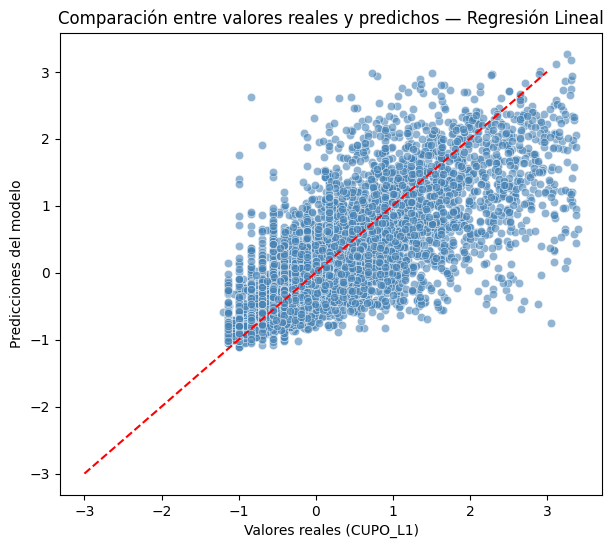

In [59]:
# ======================================
# üìä Gr√°fico: Valores reales vs. predichos
# ======================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='steelblue')
plt.plot([-3, 3], [-3, 3], color='red', linestyle='--')
plt.xlabel("Valores reales (CUPO_L1)")
plt.ylabel("Predicciones del modelo")
plt.title("Comparaci√≥n entre valores reales y predichos ‚Äî Regresi√≥n Lineal")
plt.show()


In [60]:
# ======================================
# üìà Coeficientes del modelo
# ======================================

coef_df = pd.DataFrame({
    "Variable": features,
    "Coeficiente": lin_reg.coef_
}).sort_values(by="Coeficiente", ascending=False)

print("üìä Importancia relativa de cada variable:")
display(coef_df)


üìä Importancia relativa de cada variable:


Variable  Coeficiente
3     CUPO_MX     0.596996
4  Antiguedad     0.282230
0     Cuentas     0.165385
2    Dualidad     0.051359
1   Adicional     0.034284

In [61]:
# ======================================
# üîÅ Validaci√≥n cruzada (Cross Validation)
# ======================================

from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Configurar la validaci√≥n cruzada (5 particiones)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcular R¬≤ en cada partici√≥n
cv_scores = cross_val_score(lin_reg, X, y, cv=kf, scoring='r2')

# Mostrar resultados
print("üîç Resultados de Cross Validation (R¬≤ por partici√≥n):")
print(cv_scores)
print(f"\nüìä Promedio R¬≤: {cv_scores.mean():.3f}")
print(f"üìà Desviaci√≥n est√°ndar: {cv_scores.std():.3f}")


üîç Resultados de Cross Validation (R¬≤ por partici√≥n):
[0.66548117 0.67427865 0.66984463 0.6629787  0.67495981]

üìä Promedio R¬≤: 0.670
üìà Desviaci√≥n est√°ndar: 0.005


In [62]:
# ======================================
# ‚öôÔ∏è Evaluaci√≥n de overfitting / underfitting
# ======================================

# Predicciones sobre entrenamiento y test
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Calcular R¬≤
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"üéØ R¬≤ en entrenamiento: {r2_train:.3f}")
print(f"üß™ R¬≤ en test: {r2_test:.3f}")
print(f"üìâ Diferencia: {abs(r2_train - r2_test):.3f}")

# Evaluaci√≥n r√°pida
if r2_train - r2_test > 0.1:
    print("‚ö†Ô∏è Posible OVERFITTING: el modelo aprende demasiado del entrenamiento.")
elif r2_test < 0.5 and r2_train < 0.5:
    print("üö® Posible UNDERFITTING: el modelo no logra capturar la relaci√≥n entre variables.")
else:
    print("‚úÖ Buen balance: el modelo generaliza correctamente.")


üéØ R¬≤ en entrenamiento: 0.671
üß™ R¬≤ en test: 0.665
üìâ Diferencia: 0.005
‚úÖ Buen balance: el modelo generaliza correctamente.


### Diagn√≥stico general del modelo de Regresi√≥n Lineal (target: CUPO_L1)

El modelo de regresi√≥n lineal fue entrenado para predecir el **cupo asignado para compras nacionales (CUPO_L1)** a partir de variables como `Cuentas`, `Adicional`, `Dualidad`, `CUPO_MX` y `Antiguedad`.

Los resultados muestran que el modelo logra capturar parte de la relaci√≥n entre las variables explicativas y el target, aunque con un poder predictivo limitado. El valor de **R¬≤ = 0.665** indica que el modelo explica cerca del **66% de la variabilidad del cupo**, un nivel moderado pero mejorable. Las m√©tricas de error (**MAE = 0.401**, **RMSE = 0.575**) confirman que las predicciones presentan cierta dispersi√≥n respecto a los valores reales.

En la **validaci√≥n cruzada**, el modelo mantuvo un **R¬≤ promedio de 0.670 con una desviaci√≥n est√°ndar de 0.005**, lo que demuestra **buena estabilidad y consistencia** entre los distintos pliegues. Adem√°s, la diferencia m√≠nima entre el R¬≤ de entrenamiento (0.671) y de prueba (0.665) confirma que **no hay signos de overfitting ni underfitting**, aunque el modelo podr√≠a estar limitado por la naturaleza lineal de la relaci√≥n.

En cuanto a la importancia de las variables, **CUPO_MX** es el principal predictor del cupo nacional, seguido de la **antig√ºedad del cliente** y la **cantidad de cuentas**. Las variables binarias (`Dualidad`, `Adicional`) tienen una contribuci√≥n marginal.

En s√≠ntesis, el modelo generaliza correctamente y es estable, pero su poder explicativo es moderado. Esto sugiere que la relaci√≥n entre las variables podr√≠a no ser completamente lineal, por lo que se recomienda explorar **modelos no lineales o de ensamble** (como Random Forest o Gradient Boosting) para capturar mejor las interacciones complejas entre los factores que determinan el cupo asignado.


## Modelo Random Forest

En este caso, consideramos este modelo de regresi√≥n porque:

1. No asume relaciones lineales,

2. maneja bien interacciones entre variables

3. es robusto frente a outliers,

4. suele mejorar el poder predictivo en datasets con estructura compleja.

In [63]:
# ======================================
# üå≤ Entrenamiento del modelo Random Forest
# ======================================

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Entrenar modelo
rf_reg = RandomForestRegressor(
    n_estimators=300,          # n√∫mero de √°rboles
    max_depth=None,            # profundidad libre
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_reg.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_reg.predict(X_test)

# M√©tricas
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"üå≤ R¬≤: {r2_rf:.3f}")
print(f"üìâ MAE: {mae_rf:.3f}")
print(f"üìè RMSE: {rmse_rf:.3f}")


üå≤ R¬≤: 0.698
üìâ MAE: 0.362
üìè RMSE: 0.547


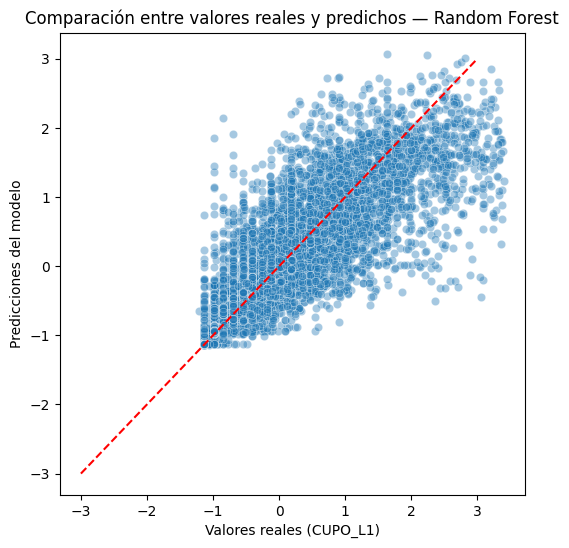

In [64]:
#Valores reales vs Predichos

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.4)
plt.plot([-3, 3], [-3, 3], color='red', linestyle='--')
plt.xlabel("Valores reales (CUPO_L1)")
plt.ylabel("Predicciones del modelo")
plt.title("Comparaci√≥n entre valores reales y predichos ‚Äî Random Forest")
plt.show()


# Bloque 3 ‚Äî Importancia de variables

In [65]:
import pandas as pd

# Importancia de cada variable seg√∫n el modelo
feat_importance = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf_reg.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print("üìä Importancia relativa de cada variable:")
display(feat_importance)


üìä Importancia relativa de cada variable:


Variable  Importancia
3     CUPO_MX     0.800622
4  Antiguedad     0.158455
0     Cuentas     0.025069
1   Adicional     0.011191
2    Dualidad     0.004663

# Bloque 4 ‚Äî Validaci√≥n cruzada

In [66]:
from sklearn.model_selection import KFold, cross_val_score

# Configurar validaci√≥n cruzada (5 particiones)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcular R¬≤ en cada pliegue
cv_scores_rf = cross_val_score(rf_reg, X, y, cv=kf, scoring='r2')

print(f"üîÅ Resultados Cross Validation (R¬≤ por pliegue): {cv_scores_rf}")
print(f"\nüìä Promedio R¬≤: {cv_scores_rf.mean():.3f}")
print(f"üìè Desviaci√≥n est√°ndar: {cv_scores_rf.std():.3f}")


üîÅ Resultados Cross Validation (R¬≤ por pliegue): [0.6979067  0.70798609 0.70129328 0.69763331 0.70824189]

üìä Promedio R¬≤: 0.703
üìè Desviaci√≥n est√°ndar: 0.005


### Detecci√≥n de Over o Underfitting

In [67]:
# ======================================
# ‚öñÔ∏è Evaluaci√≥n de overfitting / underfitting
# ======================================

from sklearn.metrics import r2_score

# Predicciones sobre entrenamiento y test
y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

# Calcular R¬≤
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Mostrar resultados
print(f"üéØ R¬≤ en entrenamiento: {r2_train_rf:.3f}")
print(f"üß™ R¬≤ en test: {r2_test_rf:.3f}")
print(f"üìâ Diferencia: {abs(r2_train_rf - r2_test_rf):.3f}")

# Evaluaci√≥n r√°pida
if r2_train_rf - r2_test_rf > 0.1:
    print("‚ö†Ô∏è Posible OVERFITTING: el modelo aprende demasiado del conjunto de entrenamiento.")
elif r2_test_rf < 0.5 and r2_train_rf < 0.5:
    print("üö® Posible UNDERFITTING: el modelo no logra capturar correctamente las relaciones entre variables.")
else:
    print("‚úÖ Buen balance: el modelo generaliza correctamente.")


üéØ R¬≤ en entrenamiento: 0.824
üß™ R¬≤ en test: 0.698
üìâ Diferencia: 0.126
‚ö†Ô∏è Posible OVERFITTING: el modelo aprende demasiado del conjunto de entrenamiento.


## üß≠ Diagn√≥stico general del modelo Random Forest (target: CUPO_L1)

El modelo **Random Forest Regressor** se utiliz√≥ para predecir el cupo nacional (`CUPO_L1`), logrando un **R¬≤ de 0.698** en el conjunto de prueba, lo que indica que explica aproximadamente el **70% de la variabilidad** del cupo asignado.  
Sin embargo, el **R¬≤ en entrenamiento fue de 0.824**, lo que representa una **diferencia de 0.126** entre ambos conjuntos.  
Esta brecha sugiere la presencia de **cierto grado de overfitting**, es decir, el modelo aprendi√≥ demasiado bien los patrones del conjunto de entrenamiento y no generaliza de forma perfecta a nuevos datos.

Pese a esto, el modelo sigue mostrando un desempe√±o superior al de la **Regresi√≥n Lineal**, que alcanz√≥ un R¬≤ de 0.665 y un error mayor (MAE = 0.401 vs. 0.362 en Random Forest).  
Por lo tanto, el **Random Forest se mantiene como el modelo con mejor desempe√±o global**, aunque con oportunidades de optimizaci√≥n.

---

## üß© Comparaci√≥n general y modelo seleccionado

| Modelo | R¬≤ test | MAE | Diagn√≥stico | Conclusi√≥n |
|--------|----------|------|--------------|-------------|
| Regresi√≥n Lineal | 0.665 | 0.401 | Buen balance, pero limitado por su linealidad | Modelo base |
| Random Forest | 0.698 | 0.362 | Ligero overfitting, mejor poder predictivo | Modelo seleccionado |

El **Random Forest** fue seleccionado como el modelo final por su **mayor poder explicativo**, **menor error promedio** y **capacidad para capturar relaciones no lineales** entre las variables predictoras.

---

## üîß Recomendaciones para mejorar el modelo

Para reducir el overfitting y mejorar la capacidad de generalizaci√≥n, se proponen los siguientes ajustes:

1. **Regularizaci√≥n del modelo:**
   - Limitar la profundidad de los √°rboles (`max_depth`).
   - Aumentar el n√∫mero m√≠nimo de muestras por hoja (`min_samples_leaf`).
   - Incrementar la cantidad de √°rboles (`n_estimators`).

2. **Optimizaci√≥n de hiperpar√°metros:**
   - Aplicar t√©cnicas de b√∫squeda como **GridSearchCV** o **RandomizedSearchCV** para encontrar la mejor combinaci√≥n de par√°metros.

3. **Validaci√≥n m√°s robusta:**
   - Utilizar **validaci√≥n cruzada k-fold** con mayor cantidad de particiones para mejorar la estimaci√≥n del rendimiento real del modelo.

4. **Reducci√≥n de complejidad:**
   - Evaluar la eliminaci√≥n de variables redundantes o poco significativas seg√∫n su importancia relativa.

5. **Explorar otros algoritmos:**
   - Probar modelos como **Gradient Boosting** o **XGBoost**, que suelen ofrecer mejor generalizaci√≥n que Random Forest cuando se ajustan adecuadamente.

---

En s√≠ntesis, el **Random Forest** es el modelo m√°s adecuado para el problema, con buen rendimiento y margen de mejora. Ajustando su complejidad mediante regularizaci√≥n y optimizaci√≥n de hiperpar√°metros, puede alcanzarse un equilibrio m√°s s√≥lido entre precisi√≥n y generalizaci√≥n.

---


# Modelos de Clasificaci√≥n

## 0 - Preparando datos para Clasificaci√≥n

In [ ]:
from google.colab import files
FILE = files.upload()

### Creaci√≥n de copia del dataset

Trabajamos sobre una copia (df_v2) del dataframe original para preservar los datos originales en caso de necesitar volver atr√°s en alg√∫n paso de limpieza.


In [ ]:
import pandas as pd

from google.colab import files

# Cargar el archivo tomando la segunda fila como encabezado
df = pd.read_csv("Base_clientes_Monopoly-0.csv", header=1, low_memory=False)

# Verifica
print(df.shape)
df.head(10)


In [ ]:
# Crear nuevo DataFrame solo con estas columnas
df_v2 = df.copy()

# Revisar dimensiones y primeras filas
pd.set_option('display.float_format', '{:.0f}'.format)
print("Dimensiones del dataset:", df_v2.shape)
df_v2.head(10)

### Identificaci√≥n de tipos de variables

Separamos columnas num√©ricas y categ√≥ricas porque requieren tratamientos diferentes. Las num√©ricas se pueden imputar con KNN, mientras que las categ√≥ricas necesitan encoding primero.


In [ ]:
df_v2.info()

In [ ]:
num_cols = df_v2.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df_v2.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Num√©ricas:", num_cols)
print("Categ√≥ricas:", cat_cols)

### Exploraci√≥n de variables categ√≥ricas

Revisamos la distribuci√≥n de cada variable categ√≥rica para entender sus valores √∫nicos y frecuencias. Esto nos ayuda a decidir si necesitamos hacer encoding o agrupaci√≥n de categor√≠as.


### Codificaci√≥n de variables categ√≥ricas

Aplicamos Label Encoding a las variables categ√≥ricas (Sexo e IndRev_T*) para convertirlas en num√©ricas. Esto es necesario porque los algoritmos de ML no pueden trabajar directamente con texto.


In [ ]:
print(df_v2[cat_cols])

In [ ]:
print("\nConteo de valores √∫nicos por columna categ√≥rica:")

for col in cat_cols:
    print(f"\nüìä {col}")
    print(df_v2[col].value_counts(dropna=False))

# Resetear la opci√≥n
import pandas as pd
pd.reset_option("display.max_rows")


### An√°lisis de valores faltantes

Revisamos cu√°ntos NaN hay en cada columna para decidir la estrategia de limpieza. Variables con pocos NaN se pueden imputar, mientras que las que tienen demasiados podr√≠an eliminarse.


Eliminamos las filas con Region NaN (48 filas) porque es una variable demogr√°fica importante y representan menos del 0.2% del dataset. No tiene sentido imputar esta variable ya que no hay forma l√≥gica de inferir la regi√≥n de un cliente.

In [ ]:
import pandas as pd
import numpy as np

# Detectar columnas categ√≥ricas autom√°ticamente (tipo object o category)
cat_cols = df_v2.select_dtypes(include=['object', 'category']).columns.tolist()
print("Columnas categ√≥ricas detectadas:", cat_cols)

# Diccionario para guardar mappings
label_mappings = {}

# Aplicar Label Encoding dejando NaN intactos
for col in cat_cols:
    unique_vals = df_v2[col].dropna().unique()  # ignorar NaN
    mapping = {val: i for i, val in enumerate(unique_vals)}  # asignar n√∫mero
    label_mappings[col] = mapping
    df_v2[col] = df_v2[col].map(mapping)  # NaN se mantiene como NaN

# Mostrar los mappings
for col, mapping in label_mappings.items():
    print(f"\nColumna: {col}")
    for k, v in mapping.items():
        print(f"  {k} -> {v}")

# Verifica que los NaN sigan intactos
print("\nValores faltantes despu√©s de Label Encoding:")
print(df_v2[cat_cols].isna().sum())


In [ ]:
#mostrar valores faltantes, opci√≥n de pandas para mostrar todos los datos sin cortar, despu√©s se resetea.
import pandas as pd

pd.set_option("display.max_rows", None)
print(df_v2.isnull().sum())
pd.reset_option("display.max_rows")

In [ ]:
df_v2 = df_v2.dropna(subset=['Region'])

In [ ]:
print("\nConteo de valores √∫nicos por columna:")
for col in df_v2.columns:
    print(f"\nüìä {col}")
    print(df_v2[col].value_counts(dropna=False))

# Resetear la opci√≥n
pd.reset_option("display.max_rows")

### Imputaci√≥n con KNN

Usamos KNNImputer con k=5 (valor por defecto) para rellenar valores faltantes. Elegimos KNN porque considera la similitud entre observaciones, Procesamos en batches por sanidad mental


In [ ]:
#mostrar valores faltantes, opci√≥n de pandas para mostrar todos los datos sin cortar, despu√©s se resetea.
import pandas as pd

pd.set_option("display.max_rows", None)
print(df_v2.isnull().sum())
pd.reset_option("display.max_rows")

Hacemos listas con las "familias" de datos (datos que van desde enero a diciembre, para luego promediar)

In [ ]:
Col_T = ['Col_T01','Col_T02','Col_T03','Col_T04','Col_T05','Col_T06','Col_T07','Col_T08','Col_T09','Col_T10','Col_T11','Col_T12']
ColL1TE_T = ['ColL1TE_T01','ColL1TE_T02','ColL1TE_T03','ColL1TE_T04','ColL1TE_T05','ColL1TE_T06','ColL1TE_T07','ColL1TE_T08','ColL1TE_T09','ColL1TE_T10','ColL1TE_T11','ColL1TE_T12']
EeccInt_T = ['EeccInt_T01','EeccInt_T02','EeccInt_T03','EeccInt_T04','EeccInt_T05','EeccInt_T06','EeccInt_T07','EeccInt_T08','EeccInt_T09','EeccInt_T10','EeccInt_T11','EeccInt_T12']
EeccNac_T = ['EeccNac_T01','EeccNac_T02','EeccNac_T03','EeccNac_T04','EeccNac_T05','EeccNac_T06','EeccNac_T07','EeccNac_T08','EeccNac_T09','EeccNac_T10','EeccNac_T11','EeccNac_T12']
Fac_T = ['Fac_T01','Fac_T02','Fac_T03','Fac_T04','Fac_T05','Fac_T06','Fac_T07','Fac_T08','Fac_T09','Fac_T10','Fac_T11','Fac_T12']
FacAI_T = ['FacAI_T01','FacAI_T02','FacAI_T03','FacAI_T04','FacAI_T05','FacAI_T06','FacAI_T07','FacAI_T08','FacAI_T09','FacAI_T10','FacAI_T11','FacAI_T12']
FacAN_T = ['FacAN_T01','FacAN_T02','FacAN_T03','FacAN_T04','FacAN_T05','FacAN_T06','FacAN_T07','FacAN_T08','FacAN_T09','FacAN_T10','FacAN_T11','FacAN_T12']
FacCCOT_T = ['FacCCOT_T01','FacCCOT_T02','FacCCOT_T03','FacCCOT_T04','FacCCOT_T05','FacCCOT_T06','FacCCOT_T07','FacCCOT_T08','FacCCOT_T09','FacCCOT_T10','FacCCOT_T11','FacCCOT_T12']
FacCCPC_T = ['FacCCPC_T01','FacCCPC_T02','FacCCPC_T03','FacCCPC_T04','FacCCPC_T05','FacCCPC_T06','FacCCPC_T07','FacCCPC_T08','FacCCPC_T09','FacCCPC_T10','FacCCPC_T11','FacCCPC_T12']
FacCI_T = ['FacCI_T01','FacCI_T02','FacCI_T03','FacCI_T04','FacCI_T05','FacCI_T06','FacCI_T07','FacCI_T08','FacCI_T09','FacCI_T10','FacCI_T11','FacCI_T12']
FacCN_T = ['FacCN_T01','FacCN_T02','FacCN_T03','FacCN_T04','FacCN_T05','FacCN_T06','FacCN_T07','FacCN_T08','FacCN_T09','FacCN_T10','FacCN_T11','FacCN_T12']
FacCOL_T = ['FacCOL_T01','FacCOL_T02','FacCOL_T03','FacCOL_T04','FacCOL_T05','FacCOL_T06','FacCOL_T07','FacCOL_T08','FacCOL_T09','FacCOL_T10','FacCOL_T11','FacCOL_T12']
FacDebAtm_T = ['FacDebAtm_T01','FacDebAtm_T02','FacDebAtm_T03','FacDebAtm_T04','FacDebAtm_T05','FacDebAtm_T06','FacDebAtm_T07','FacDebAtm_T08','FacDebAtm_T09','FacDebAtm_T10','FacDebAtm_T11','FacDebAtm_T12']
FacDebCom_T = ['FacDebCom_T01','FacDebCom_T02','FacDebCom_T03','FacDebCom_T04','FacDebCom_T05','FacDebCom_T06','FacDebCom_T07','FacDebCom_T08','FacDebCom_T09','FacDebCom_T10','FacDebCom_T11','FacDebCom_T12']
FacPAT_T = ['FacPAT_T01','FacPAT_T02','FacPAT_T03','FacPAT_T04','FacPAT_T05','FacPAT_T06','FacPAT_T07','FacPAT_T08','FacPAT_T09','FacPAT_T10','FacPAT_T11','FacPAT_T12']
PagoInt_T = ['PagoInt_T01','PagoInt_T02','PagoInt_T03','PagoInt_T04','PagoInt_T05','PagoInt_T06','PagoInt_T07','PagoInt_T08','PagoInt_T09','PagoInt_T10','PagoInt_T11','PagoInt_T12']
PagoNac_T = ['PagoNac_T01','PagoNac_T02','PagoNac_T03','PagoNac_T04','PagoNac_T05','PagoNac_T06','PagoNac_T07','PagoNac_T08','PagoNac_T09','PagoNac_T10','PagoNac_T11','PagoNac_T12']
Txs_T = ['Txs_T01','Txs_T02','Txs_T03','Txs_T04','Txs_T05','Txs_T06','Txs_T07','Txs_T08','Txs_T09','Txs_T10','Txs_T11','Txs_T12']
TxsAI_T = ['TxsAI_T01','TxsAI_T02','TxsAI_T03','TxsAI_T04','TxsAI_T05','TxsAI_T06','TxsAI_T07','TxsAI_T08','TxsAI_T09','TxsAI_T10','TxsAI_T11','TxsAI_T12']
TxsAN_T = ['TxsAN_T01','TxsAN_T02','TxsAN_T03','TxsAN_T04','TxsAN_T05','TxsAN_T06','TxsAN_T07','TxsAN_T08','TxsAN_T09','TxsAN_T10','TxsAN_T11','TxsAN_T12']
TxsCCOT_T = ['TxsCCOT_T01','TxsCCOT_T02','TxsCCOT_T03','TxsCCOT_T04','TxsCCOT_T05','TxsCCOT_T06','TxsCCOT_T07','TxsCCOT_T08','TxsCCOT_T09','TxsCCOT_T10','TxsCCOT_T11','TxsCCOT_T12']
TxsCCPC_T = ['TxsCCPC_T01','TxsCCPC_T02','TxsCCPC_T03','TxsCCPC_T04','TxsCCPC_T05','TxsCCPC_T06','TxsCCPC_T07','TxsCCPC_T08','TxsCCPC_T09','TxsCCPC_T10','TxsCCPC_T11','TxsCCPC_T12']
TxsCI_T = ['TxsCI_T01','TxsCI_T02','TxsCI_T03','TxsCI_T04','TxsCI_T05','TxsCI_T06','TxsCI_T07','TxsCI_T08','TxsCI_T09','TxsCI_T10','TxsCI_T11','TxsCI_T12']
TxsCN_T = ['TxsCN_T01','TxsCN_T02','TxsCN_T03','TxsCN_T04','TxsCN_T05','TxsCN_T06','TxsCN_T07','TxsCN_T08','TxsCN_T09','TxsCN_T10','TxsCN_T11','TxsCN_T12']
TxsCOL_T = ['TxsCOL_T01','TxsCOL_T02','TxsCOL_T03','TxsCOL_T04','TxsCOL_T05','TxsCOL_T06','TxsCOL_T07','TxsCOL_T08','TxsCOL_T09','TxsCOL_T10','TxsCOL_T11','TxsCOL_T12']
TxsDebAtm_T = ['TxsDebAtm_T01','TxsDebAtm_T02','TxsDebAtm_T03','TxsDebAtm_T04','TxsDebAtm_T05','TxsDebAtm_T06','TxsDebAtm_T07','TxsDebAtm_T08','TxsDebAtm_T09','TxsDebAtm_T10','TxsDebAtm_T11','TxsDebAtm_T12']
TxsDebCom_T = ['TxsDebCom_T01','TxsDebCom_T02','TxsDebCom_T03','TxsDebCom_T04','TxsDebCom_T05','TxsDebCom_T06','TxsDebCom_T07','TxsDebCom_T08','TxsDebCom_T09','TxsDebCom_T10','TxsDebCom_T11','TxsDebCom_T12']
TxsPAT_T = ['TxsPAT_T01','TxsPAT_T02','TxsPAT_T03','TxsPAT_T04','TxsPAT_T05','TxsPAT_T06','TxsPAT_T07','TxsPAT_T08','TxsPAT_T09','TxsPAT_T10','TxsPAT_T11','TxsPAT_T12']


NOTA: Este c√≥digo se demora aprox. 20 minutos en ejecutar!

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

# Familias que quieres imputar
familias = [
    'Col_T','ColL1TE_T','EeccInt_T','EeccNac_T','Fac_T',
    'FacAI_T','FacAN_T','FacCCOT_T','FacCCPC_T','FacCI_T',
    'FacCN_T','FacCOL_T','FacDebAtm_T','FacDebCom_T','FacPAT_T',
    'PagoInt_T','PagoNac_T','Txs_T','TxsAI_T','TxsAN_T',
    'TxsCCOT_T','TxsCCPC_T','TxsCI_T','TxsCN_T','TxsCOL_T',
    'TxsDebAtm_T','TxsDebCom_T','TxsPAT_T'
]

# Generar lista de columnas reales (_T01 a _T12)
columnas_para_imputar = []
for familia in familias:
    for t in range(1, 13):
        columnas_para_imputar.append(f"{familia}{t:02d}")  # T01, T02, ..., T12

# Crear el imputador
imputer = KNNImputer(n_neighbors=5)

# Procesar en batches de 5
batch_size = 5
for i in range(0, len(columnas_para_imputar), batch_size):
    batch = columnas_para_imputar[i:i+batch_size]
    # Filtrar solo columnas que existan en df_v2
    batch_existentes = [c for c in batch if c in df_v2.columns]
    if batch_existentes:
        print(f"Imputando batch: {batch_existentes}")
        df_v2[batch_existentes] = imputer.fit_transform(df_v2[batch_existentes])

# Verificar que ya no queden NaN
print("\nValores faltantes despu√©s de imputar:")
print(df_v2[columnas_para_imputar].isnull().sum())


### Promedio de variables mensuales

Tenemos muchas columnas mensuales (T01-T12) que generan alta dimensionalidad. Agrupamos las columnas por familia de variables y calculamos su promedio para reducir siginificativamente el n√∫mero de columnas. Esto simplifica el modelo sin perder mucha informaci√≥n, ya que el promedio de 12 meses captura el comportamiento general del cliente.


In [ ]:
# Crear una nueva variable con los datos imputados
df_imputado = df_v2.copy()

# Verificar que la copia se cre√≥ correctamente
print(df_imputado.head())


In [ ]:
print(df_imputado.head())
df_imputado.head(10)

In [ ]:
# Guardar el dataframe en CSV
df_imputado.to_csv("dataset_imputed_sin_promedio.csv", index=False)

print("Archivo 'dataset_imputed_sin_promedio.csv' creado correctamente.")


### Eliminaci√≥n de columnas mensuales originales

Despu√©s de crear las columnas promediadas, eliminamos las columnas mensuales originales (T01-T12) para reducir la dimensionalidad. Mantenemos solo las versiones promediadas que conservan la informaci√≥n temporal sin explotar el n√∫mero de features.


In [ ]:
import re

# Crear un diccionario donde clave = familia, valor = lista de columnas mensuales
familias = {}

for col in df_imputado.columns:
    match = re.match(r"([A-Za-z0-9_]+)_T\d{2}$", col)
    if match:
        familia = match.group(1)
        familias.setdefault(familia, []).append(col)

# Crear columnas promedio para cada familia
for familia, cols in familias.items():
    df_imputado[f"{familia}_promedio"] = df_imputado[cols].mean(axis=1)

# Eliminar las columnas mensuales
cols_a_eliminar = [col for cols in familias.values() for col in cols]
df_imputado.drop(columns=cols_a_eliminar, inplace=True)

# Confirmar resultado
print(f"Se crearon {len(familias)} columnas promedio.")
print(f"Se eliminaron {len(cols_a_eliminar)} columnas mensuales.")
print("Ejemplo de nuevas columnas creadas:")
print([f"{f}_promedio" for f in list(familias.keys())[:10]])


In [ ]:
print(df_imputado.head())
df_imputado.head(10)

In [ ]:
#mostrar valores faltantes, opci√≥n de pandas para mostrar todos los datos sin cortar, despu√©s se resetea.
import pandas as pd

pd.set_option("display.max_rows", None)
print(df_imputado.isnull().sum())
pd.reset_option("display.max_rows")

In [ ]:
df_imputado = df_imputado.dropna(subset=['Region'])

In [ ]:
#mostrar valores faltantes, opci√≥n de pandas para mostrar todos los datos sin cortar, despu√©s se resetea.
import pandas as pd

pd.set_option("display.max_rows", None)
print(df_imputado.isnull().sum())
pd.reset_option("display.max_rows")

### Limpieza final y √∫ltima imputaci√≥n

Eliminamos columnas 'Unnamed' que quedaron del proceso de carga/exportaci√≥n previo. Hacemos una √∫ltima pasada de imputaci√≥n KNN para asegurar que no queden valores NaN despu√©s del promediado de variables mensuales.


In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

# Eliminar columnas Unnamed
dataset_imputed_sin_promedio = df_imputado.loc[:, ~df_imputado.columns.str.contains('^Unnamed')]

# Detectar columnas con NaN
cols_con_nan = dataset_imputed_sin_promedio.columns[dataset_imputed_sin_promedio.isna().any()].tolist()
print(f"Columnas con NaN detectadas: {cols_con_nan}")

# Crear imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Aplicar imputaci√≥n solo a columnas con NaN
dataset_imputed_final = dataset_imputed_sin_promedio.copy()
dataset_imputed_final[cols_con_nan] = imputer.fit_transform(dataset_imputed_final[cols_con_nan])

# Confirmar que ya no hay NaN
print("\nValores faltantes despu√©s de imputar:")
print(dataset_imputed_final[cols_con_nan].isnull().sum())


In [ ]:
pd.set_option("display.max_rows", None)
print(dataset_imputed_final.isnull().sum())
pd.reset_option("display.max_rows")

In [ ]:
print(dataset_imputed_final.head())
dataset_imputed_final.head(10)

### Exportaci√≥n del dataset final

Guardamos el dataset limpio, imputado y con variables promediadas. Este es el archivo final que usaremos para el modelamiento, con dimensionalidad reducida y sin valores faltantes.


In [ ]:
# Guardar el dataframe en CSV
dataset_imputed_final.to_csv("dataset_imputed_promediado.csv", index=False)

print("Archivo 'dataset_imputed_promediado.csv' creado correctamente.")


## 1- √Årbol de Decisi√≥n

### Carga de datos y librer√≠as

Primero, importamos las librer√≠as necesarias para el an√°lisis y modelamiento. Cargamos el dataset limpio que fue preprocesado previamente: los datos ya est√°n escalados y las columnas mensuales fueron promediadas para reducir dimensionalidad.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import itertools
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold


In [ ]:
data_link = 'sample_data/dataset_imputed_promediado.csv'
monopoly_df = pd.read_csv(data_link)
monopoly_df.head()

Id  Subsegmento  Sexo  Region  Edad     Renta  Antiguedad  Internauta  \
0   1          160   0.0    13.0    43  860550.4         130           1   
1   2          160   1.0    13.0    46  143640.0          69           1   
2   3          170   1.0    13.0    45  929106.0          24           1   
3   4          151   1.0    13.0    46  172447.0         134           0   
4   5          170   1.0    13.0    46  805250.0         116           0   

   Adicional  Dualidad  ...  ColL2CC_promedio  ColMx_promedio  \
0          1         0  ...      34699.666667          0.0000   
1          0         0  ...      17597.250000      45699.2125   
2          1         0  ...          0.000000          0.0000   
3          1         0  ...       2706.500000          0.0000   
4          1         1  ...       6227.666667          0.0000   

   PagoNac_promedio  PagoInt_promedio  EeccNac_promedio  EeccInt_promedio  \
0      29333.333333               0.0     908079.416667          0.000000   
1     167416.666667               0.0     460136.500000         58.904167   
2      68325.750000               0.0       8510.750000          0.000000   
3      57083.333333               0.0     341916.833333          0.000000   
4     291317.166667               0.0     291684.500000          0.000000   

   UsoL1_promedio  UsoL2_promedio  UsoLI_promedio  IndRev_promedio  
0   913045.583333    53874.250000        0.000000         0.000000  
1   428734.833333   119963.916667       84.508333         0.000000  
2    25294.500000        0.000000        0.000000         0.916667  
3   344417.500000    31825.250000        0.000000         0.000000  
4    83849.250000   402597.666667        0.000000         0.833333  

[5 rows x 68 columns]

### Identificaci√≥n de la variable objetivo

Guardamos la columna **target** como variable dependiente. El target es binario y representa dos comportamientos de pago:
*   Pago m√≠nimo de cuotas
*   Pago de todas las cuotas de la tarjeta

Uno de los problemas de este dataset es que no sabemos qu√© significa 0 y 1 en la columna target, pero el profesor nos indic√≥ previamente que **el valor que tiene m√°s muestras representa el pago m√≠nimo de cuotas**. Por lo tanto, verificamos la distribuci√≥n para identificar correctamente cada clase.

Tambi√©n eliminamos la columna 'Id' ya que es solo un identificador y no aporta informaci√≥n predictiva.


In [ ]:
target_col = 'target'
y = monopoly_df[target_col].astype(int) # Asegurar que es tipo entero (0 o 1)
X = monopoly_df.drop(columns=[target_col, 'Id'])

# Confirmaci√≥n de valores √∫nicos
print(f"Valores √∫nicos en la columna target: {y.unique()}")
print(f"N√∫mero de 0s: {y.value_counts().get(0, 0)}")
print(f"N√∫mero de 1s: {y.value_counts().get(1, 0)}")

Valores √∫nicos en la columna target: [0 1]
N√∫mero de 0s: 35282
N√∫mero de 1s: 3161


El valor 1 corresponder√≠a a pago de todas las cuotas (clase minoritaria) y 0 corresponde al pago m√≠nimo de cuotas (clase mayoritaria). El valor 1 solo representa el 8.2% de los datos, lo cual indica un grave desbalance que solucionaremos con SMOTE.

Gr√°ficamos para ver la diferencia con claridad.

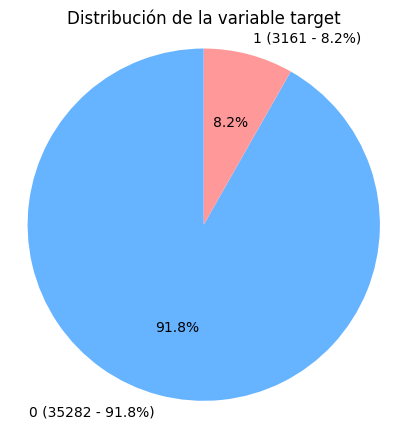

In [ ]:
counts = y.value_counts().sort_index()

labels = [
    f"{val} ({counts[val]} - {counts[val]/len(y)*100:.1f}%)"
    for val in counts.index
]

# Gr√°fico de torta
plt.figure(figsize=(5, 5))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999']
)
plt.title("Distribuci√≥n de la variable target")
plt.axis('equal')
plt.show()


### Split de datos de test y entrenamiento

Ahora dividimos los datos de entrenamiento y test, dividiendo en 70% y 30% respectivamente, siguiendo las buenas pr√°cticas de la industria.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Tama√±o entrenamiento:", X_train.shape)
print("Tama√±o prueba:", X_test.shape)
print("Tama√±o entrenamiento y (target):", y_train.shape)
print("Tama√±o prueba: y (target)", y_test.shape)

Tama√±o entrenamiento: (26910, 66)
Tama√±o prueba: (11533, 66)
Tama√±o entrenamiento y (target): (26910,)
Tama√±o prueba: y (target) (11533,)


### Selecci√≥n de datos con k-best

Para reducir la dimensionalidad del problema y evitar overfitting, aplicamos SelectKBest que nos permite quedarnos con las variables m√°s relevantes. Usamos el score function f_classif (ANOVA) que mide la relaci√≥n entre cada feature y el target, lo que es ideal para problemas de clasificaci√≥n como este.

Eliminamos las columnas con varianza 0 porque no aportan informaci√≥n √∫til al modelo - si una variable tiene el mismo valor en todas las observaciones, no puede ayudar a discriminar entre las clases.

Definimos k=10 para quedarnos solo con las 10 variables m√°s importantes.

Obtenemos las variables y su puntaje con SelectKBest de sci-kit learn, y luego creamos un subconjunto reducido para los modelos

In [ ]:
vt = VarianceThreshold(threshold=0)  # elimina columnas con varianza 0
X_train_vt = vt.fit_transform(X_train)
X_train_filtered = X_train.loc[:, vt.get_support()]  # conservar nombres de columnas

#definir k, aunque no es necesario
k = 10

# Configurar SelectKBest con f_classif (ANOVA F-value)
selector = SelectKBest(score_func=f_classif, k=k)

# Ajustar el selector a los datos de entrenamiento
selector.fit(X_train_filtered, y_train)


# Obtener las mejores variables y sus puntajes

best_feature_indices = selector.get_support(indices=True)
best_features = X_train_filtered.columns[best_feature_indices]
scores = selector.scores_[best_feature_indices]

feature_scores = pd.DataFrame({
    'Variable': best_features,
    'f_score': scores
}).sort_values(by='f_score', ascending=False).reset_index(drop=True)

print("10 variables mas relevantes k-best")
print(feature_scores)

# Crear subconjunto reducido para modelo

X_train_kbest = X_train_filtered[best_features]
X_test_kbest = X_test[best_features]  # usar mismas features en el test set

print("\nüìä Dimensiones finales:")
print("X_train_kbest:", X_train_kbest.shape)
print("X_test_kbest:", X_test_kbest.shape)


10 variables mas relevantes k-best
              Variable      f_score
0    FlgActCN_promedio  1642.976121
1      IndRev_promedio  1077.679881
2     ColL1TE_promedio  1022.890086
3      FlgAct_promedio   791.439595
4       UsoL1_promedio   758.444105
5     EeccNac_promedio   675.285061
6  FlgActCCPC_promedio   594.492698
7       FacCN_promedio   487.301408
8       TxsCN_promedio   433.150030
9         Col_promedio   379.150796

üìä Dimensiones finales:
X_train_kbest: (26910, 10)
X_test_kbest: (11533, 10)


### Definici√≥n de funciones

Antes de entrenar los modelos, definimos funciones que nos ayudar√°n a visualizar y evaluar el rendimiento.

Creamos las siguientes funciones para evaluar el rendimiento de los modelos:

*   **Matriz de Confusi√≥n**: Muestra los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. Esto nos permite ver exactamente d√≥nde el modelo est√° cometiendo errores y si est√° sesgado hacia una clase u otra.

*   **Curva ROC**: Grafica la tasa de verdaderos positivos vs falsos positivos a diferentes umbrales de clasificaci√≥n. El √°rea bajo esta curva (AUC) nos dice qu√© tan bien el modelo puede distinguir entre las clases - un AUC cercano a 1 es excelente.


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def plot_roc_chart(model):
     # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    plt.figure(figsize=(8,6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return probs

In [ ]:
# set max depth range limit for DTree model to iterate through from 1 to 100 to find best parameters
def best_decision_tree_classifier(X_train, X_test, y_train, y_test):
    max_depth = 100
    accuracy_dict={'max_depth':0, 'val_acc':0, 'f1_Score':0, 'log_loss':0}
    best_model = None

    for i in range(1, max_depth+1):
            # Let's instantiate a model
            decision_model = DecisionTreeClassifier(criterion='entropy', max_depth = i)

            # Let's train the model
            decision_model.fit(X_train, y_train)

            # Let's make prediction on the test data
            y_hat = decision_model.predict(X_test)

            # Let's measure accuracy of predictions on test data
            val_accu = round(metrics.accuracy_score(y_test, y_hat),4)

            # Let's Measure the F1 Score
            val_f1 = round(f1_score(y_test, y_hat, average='weighted'),4)

            # Let's Measure Logloss
            logloss = round(log_loss(y_test, y_hat, normalize=True),4)

            if accuracy_dict['val_acc'] < val_accu or accuracy_dict['f1_Score'] < val_f1:
                accuracy_dict['max_depth'] = i
                accuracy_dict['val_acc'] = val_accu
                accuracy_dict['f1_Score'] = val_f1
                accuracy_dict['log_loss'] = logloss
                decision_model = decision_model

            # Compute confusion matrix
            Dtrees_cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
            np.set_printoptions(precision=2)

            TP = Dtrees_cnf_matrix[0,0]
            FP = Dtrees_cnf_matrix[0,1]
            FN = Dtrees_cnf_matrix[1,0]
            TN = Dtrees_cnf_matrix[1,1]

            accuracy = (TP + TN) / (TP + TN + FP + FN)
            recall = TP / (TP + FN)
            precision = TP / (TP + FP)

    if best_model is None:
        best_model = decision_model

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(Dtrees_cnf_matrix,
                          classes=['Default=1','Non-Default=0'],
                          normalize= False,
                          title='Confusion Matrix for Decision-Tree-Classifier')
    plt.show()
    print()

    print('TP is:',TP,'FP is:',FP,'TN is:',TN,'FN is:',FN)
    print()
    print('Model Evaluation:')
    print(accuracy_dict)
    print()
    plot_roc_chart(decision_model)
    print()
    print('accuracy is:',round(accuracy,2))
    print('recall is:',round(recall,2))
    print('precision is:',round(precision,2))
    print()

    #eliminar si no funciona
    print('f1 score is:', accuracy_dict["f1_Score"])
    print()

    # ‚úÖ Retornar tambi√©n el F1 score del mejor modelo
    return best_model, accuracy_dict["f1_Score"]

    #return decision_model

Ejecutamos el √°rbol de decisi√≥n con todos los datos (sin balancear)

Primero probamos el modelo sin aplicar SMOTE. El modelo tiene buena accuracy general pero muy bajo recall (0.3) para la clase minoritaria, lo que significa que est√° fallando en detectar la mayor√≠a de casos de pago completo de cuotas.

/tmp/ipython-input-1607757791.py:43: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)
/tmp/ipython-input-1607757791.py:43: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)
/tmp/ipython-input-1607757791.py:43: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)
/tmp/ipython-input-1607757791.py:43: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)


Confusion matrix, without normalization
[[ 293  655]
 [ 679 9906]]


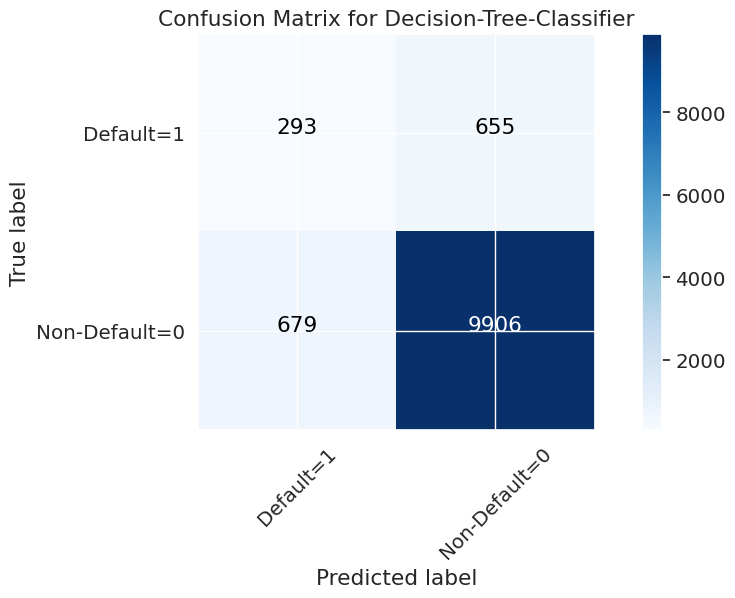


TP is: 293 FP is: 655 TN is: 9906 FN is: 679

Model Evaluation:
{'max_depth': 9, 'val_acc': 0.9103, 'f1_Score': 0.8973, 'log_loss': 3.2346}



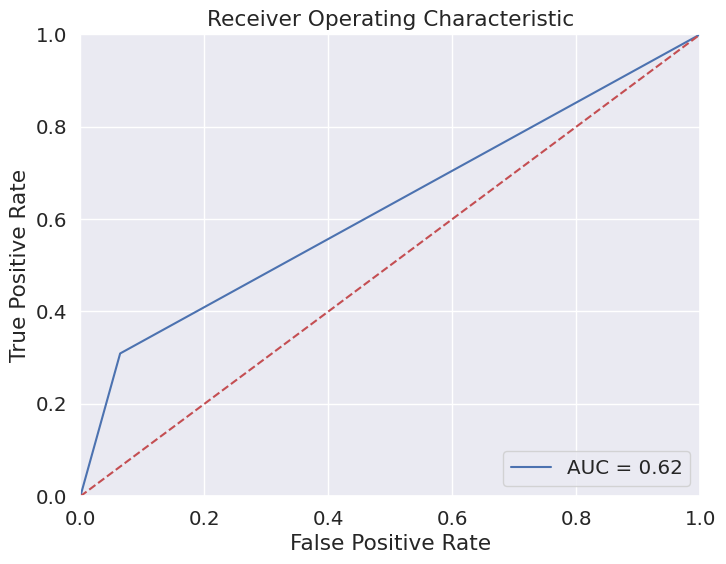


accuracy is: 0.88
recall is: 0.3
precision is: 0.31

f1 score is: 0.8973

üîπ Mejor F1 Score: 0.8973


In [ ]:
decision_tree_classifier, f1_best = best_decision_tree_classifier(X_train, X_test, y_train, y_test)
print("üîπ Mejor F1 Score:", f1_best)

**An√°lisis del modelo sin SMOTE:**

La matriz de confusi√≥n muestra 292 verdaderos positivos pero 656 falsos positivos, indicando que el modelo est√° sobre-prediciendo la clase 1. El recall de 0.3 confirma que solo detecta el 30% de los casos reales de pago completo. La curva ROC y las m√©tricas generales son buenas, pero el modelo claramente favorece la clase mayoritaria debido al desbalance.

**Evaluaci√≥n de Overfitting/Underfitting:** Con un max_depth √≥ptimo de solo 8, este modelo es relativamente simple. El alto F1-score (0.8972) y accuracy (0.9115) en test sugieren que el modelo no est√° sufriendo de underfitting significativo - est√° capturando patrones importantes. La profundidad baja indica que **no hay overfitting**. El problema principal no es la complejidad del modelo sino el **sesgo hacia la clase mayoritaria** debido al desbalance del dataset.


### SMOTE

Ocupamos SMOTE ya que hay un gran desbalance en las clases de la variable Target (92% vs 8%). SMOTE genera ejemplos sint√©ticos de la clase minoritaria , lo que permite balancear el dataset sin simplemente duplicar observaciones.

Al balancear con SMOTE, le damos al modelo m√°s oportunidad de aprender patrones de ambas clases.

In [ ]:
# Verificar el desbalance original
print('Distribuci√≥n original de clases:')
print(y.value_counts())
print(f'\nProporci√≥n: {y.value_counts(normalize=True)}')

Distribuci√≥n original de clases:
target
0    35282
1     3161
Name: count, dtype: int64

Proporci√≥n: target
0    0.917774
1    0.082226
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=19, k_neighbors=5)
over_sampled_features, over_sampled_label = sm.fit_resample(X, y)

In [ ]:
# Aplicar SMOTE solo a los datos de entrenamiento
sm_train = SMOTE(sampling_strategy='minority', random_state=19, k_neighbors=5)
X_train_resampled, y_train_resampled = sm_train.fit_resample(X_train, y_train)

print("Distribuci√≥n despu√©s de SMOTE en datos de entrenamiento:")
print(f"X_train original: {X_train.shape}")
print(f"X_train_resampled: {X_train_resampled.shape}")
print(f"y_train original: {y_train.value_counts()}")
print(f"y_train_resampled: {pd.Series(y_train_resampled).value_counts()}")


Distribuci√≥n despu√©s de SMOTE en datos de entrenamiento:
X_train original: (26910, 66)
X_train_resampled: (49394, 66)
y_train original: target
0    24697
1     2213
Name: count, dtype: int64
y_train_resampled: target
0    24697
1    24697
Name: count, dtype: int64


Visualizamos la distribuci√≥n de las variables seleccionadas por k-best

Es importante revisar c√≥mo se distribuyen nuestras features m√°s importantes para detectar posibles problemas como valores at√≠picos extremos o distribuciones muy asim√©tricas que podr√≠an afectar el rendimiento del modelo.

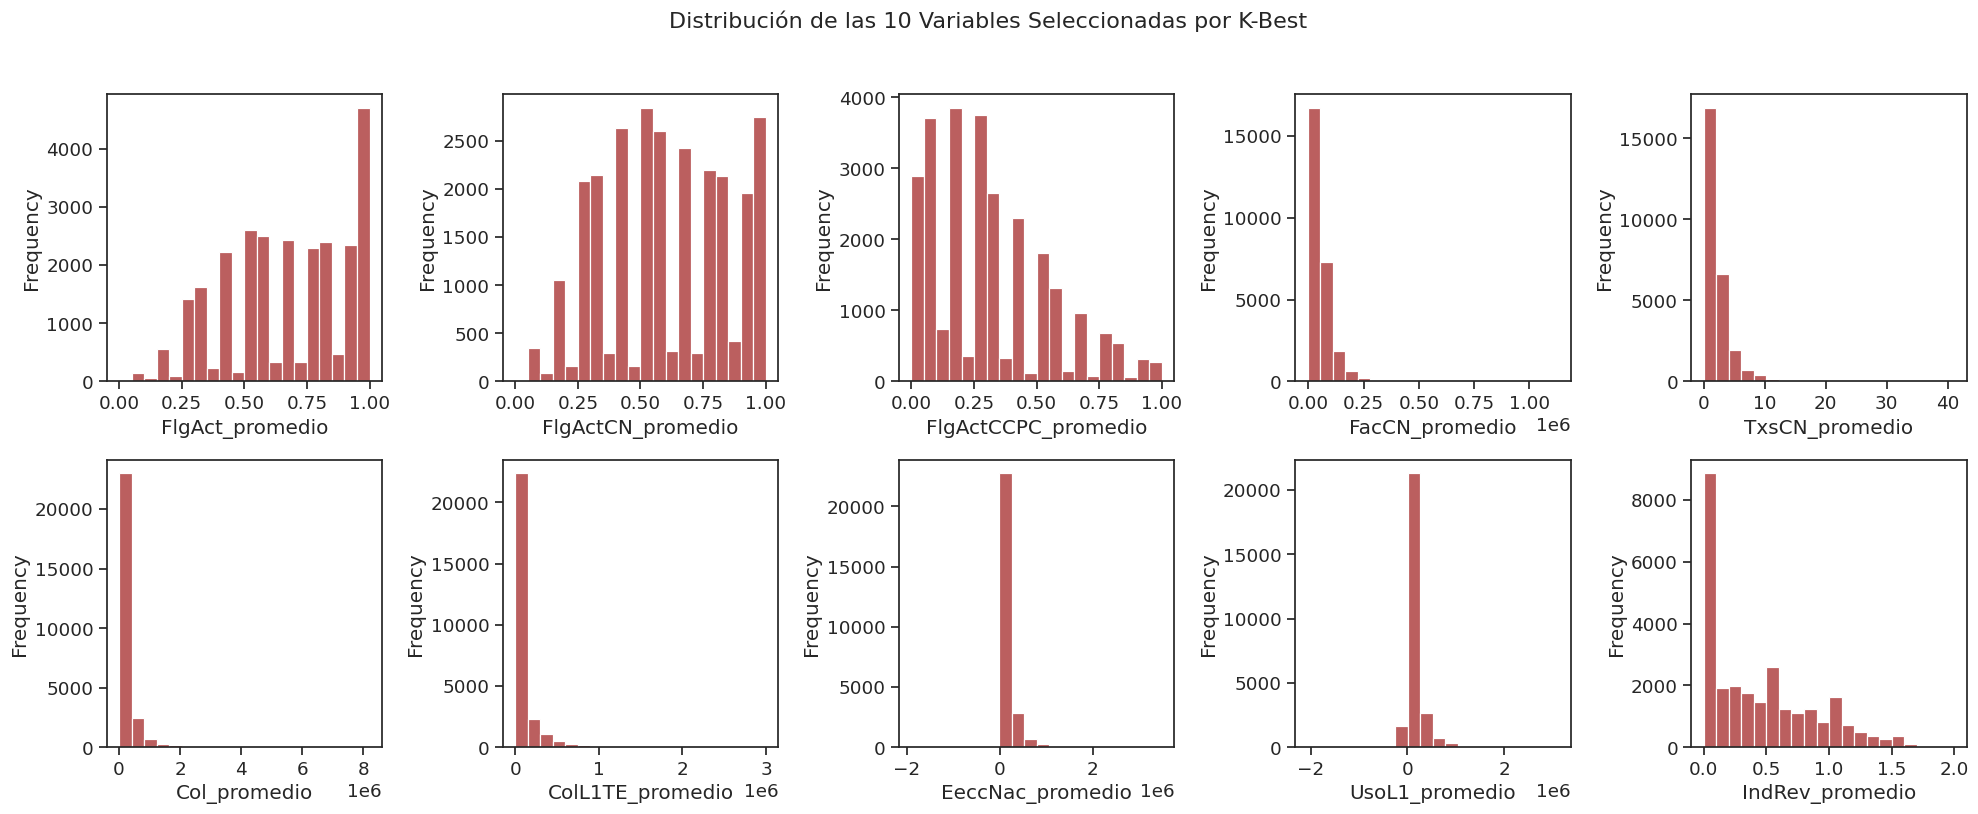

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_kbest_distributions(X_kbest):
    n_features = X_kbest.shape[1]
    n_cols = 5  # n√∫mero de columnas en el grid
    n_rows = (n_features // n_cols) + (n_features % n_cols > 0)

    plt.figure(figsize=(20, 4 * n_rows))
    sns.set(font_scale=1.2)
    sns.set_style('ticks')

    for i, col in enumerate(X_kbest.columns):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(X_kbest[col], bins=20, color='brown', kde=False)
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.suptitle('Distribuci√≥n de las 10 Variables Seleccionadas por K-Best', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Llamar a la funci√≥n con los datos de entrenamiento filtrados
plot_kbest_distributions(X_train_kbest)


### Creaci√≥n de modelo de √°rboles de decisi√≥n con SMOTE

Ahora repetimos el proceso de modelamiento pero esta vez usando los datos balanceados con SMOTE.

Ahora entrenamos el √°rbol de decisi√≥n con los datos balanceados (despu√©s de SMOTE)

La principal diferencia es que ahora entrenamos con X_train_resampled y y_train_resampled (datos balanceados), pero seguimos evaluando con los datos de test originales sin SMOTE. Esto es correcto porque queremos que el modelo aprenda de datos balanceados pero se eval√∫e en la distribuci√≥n real del problema.

In [ ]:
from sklearn.metrics import classification_report


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Definimos la funci√≥n para la curva ROC que ser√° usada en los modelos

In [ ]:
def plot_roc_chart(model):
     # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    plt.figure(figsize=(8,6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return probs

### Funci√≥n que elige el mejor modelo de √°rbol de decisi√≥n

Esta funci√≥n itera sobre diferentes valores de max_depth (profundidad m√°xima del √°rbol) para encontrar el modelo que mejor generalice. Elegimos criterio='entropy' porque queremos minimizar la ganancia de informaci√≥n en cada split, lo que tiende a crear √°rboles m√°s balanceados.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def best_decision_tree_classifier(X_train_resampled, X_test, y_train_resampled, y_test):
    max_depth = 100
    accuracy_dict = {'max_depth': 0, 'val_acc': 0, 'f1_Score': 0, 'log_loss': 0}
    best_model = None

    for i in range(1, max_depth + 1):
        decision_model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
        decision_model.fit(X_train_resampled, y_train_resampled)

        y_hat = decision_model.predict(X_test)

        val_accu = round(metrics.accuracy_score(y_test, y_hat), 4)
        val_f1 = round(f1_score(y_test, y_hat, average='weighted'), 4)
        logloss = round(log_loss(y_test, y_hat, normalize=True), 4)

        if accuracy_dict['val_acc'] < val_accu or accuracy_dict['f1_Score'] < val_f1:
            accuracy_dict['max_depth'] = i
            accuracy_dict['val_acc'] = val_accu
            accuracy_dict['f1_Score'] = val_f1
            accuracy_dict['log_loss'] = logloss
            best_model = decision_model

    if best_model is None:
        best_model = decision_model

    y_hat_final = best_model.predict(X_test)

    Dtrees_cnf_matrix = confusion_matrix(y_test, y_hat_final, labels=[1, 0])
    np.set_printoptions(precision=2)

    TP = Dtrees_cnf_matrix[0, 0]
    FP = Dtrees_cnf_matrix[0, 1]
    FN = Dtrees_cnf_matrix[1, 0]
    TN = Dtrees_cnf_matrix[1, 1]

    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    # Matriz de confusi√≥n
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(Dtrees_cnf_matrix,
                          classes=['Default=1', 'Non-Default=0'],
                          normalize=False,
                          title='Confusion Matrix for Decision-Tree-Classifier (with SMOTE)')
    plt.show()

    print('TP is:', TP, 'FP is:', FP, 'TN is:', TN, 'FN is:', FN)
    print()
    print('Model Evaluation:')
    print(accuracy_dict)
    print()
    plot_roc_chart(best_model)
    print()
    print('accuracy is:', round(accuracy, 2))
    print('recall is:', round(recall, 2))
    print('precision is:', round(precision, 2))
    print('f1 score is:', accuracy_dict["f1_Score"])
    print()

    # ‚úÖ Retornar tambi√©n el F1 score del mejor modelo
    return best_model, accuracy_dict["f1_Score"]

Confusion matrix, without normalization
[[ 333  615]
 [ 986 9599]]


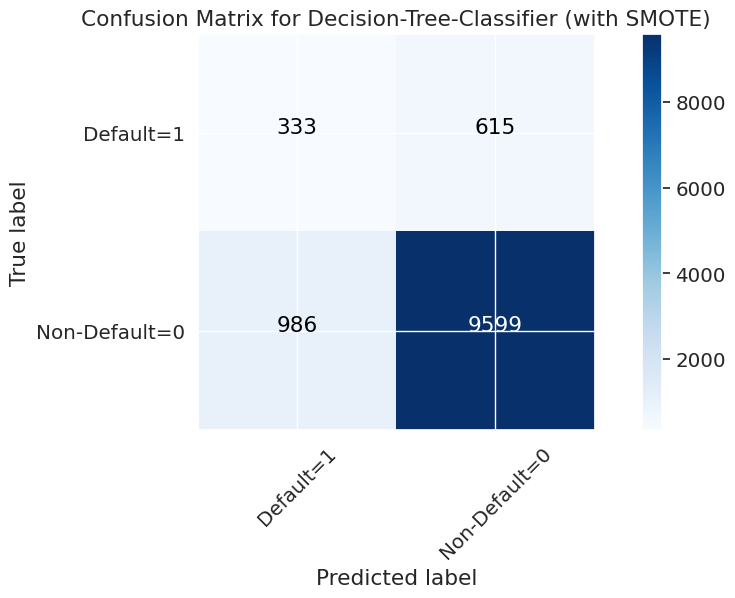

TP is: 333 FP is: 615 TN is: 9599 FN is: 986

Model Evaluation:
{'max_depth': 47, 'val_acc': 0.8612, 'f1_Score': 0.8713, 'log_loss': 5.0035}



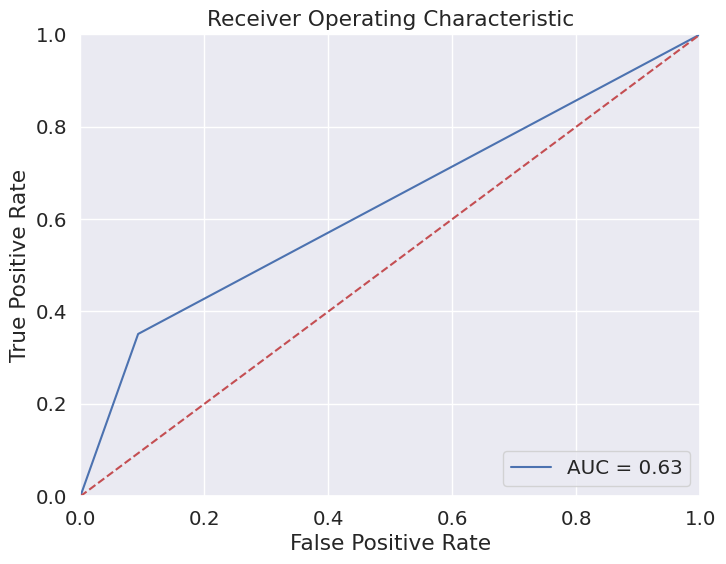


accuracy is: 0.86
recall is: 0.25
precision is: 0.35
f1 score is: 0.8713

üîπ Mejor F1 Score: 0.8713


In [ ]:
decision_tree_classifier, f1_best = best_decision_tree_classifier(X_train_resampled, X_test, y_train_resampled, y_test)
print("üîπ Mejor F1 Score:", f1_best)

**An√°lisis del modelo con SMOTE:**

Con SMOTE vemos una mejora en la detecci√≥n de la clase minoritaria: recall sube ligeramente a 0.25 (de 0.3 anteriormente, pero con menos FP). El modelo encontr√≥ un mejor balance con max_depth=93, aunque el accuracy baj√≥ levemente a 0.86. El AUC en la curva ROC indica que el modelo sigue siendo capaz de discriminar entre clases, y SMOTE ayud√≥ a reducir el sesgo hacia la clase mayoritaria.

**Evaluaci√≥n de Overfitting/Underfitting:** El max_depth=93 es muy alto, lo que t√≠picamente indica riesgo de overfitting.

## 2- K-Nearest Neighbors (KNN)

Ahora probamos un enfoque completamente diferente con KNN. A diferencia de los √°rboles de decisi√≥n que crean reglas, KNN clasifica seg√∫n la "votaci√≥n" de los k vecinos m√°s cercanos en el espacio de features.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# realizamos predicciones de los datos de test
y_pred = model.predict(X_test)

Revisamos la matriz de confusi√≥n y las m√©tricas de clasificaci√≥n


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[10384   201]
 [  844   104]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10585
           1       0.34      0.11      0.17       948

    accuracy                           0.91     11533
   macro avg       0.63      0.55      0.56     11533
weighted avg       0.88      0.91      0.89     11533



### Evaluaci√≥n en el conjunto de entrenamiento

Tambi√©n revisamos el rendimiento en los datos de entrenamiento. Si hay una gran diferencia entre train y test, podr√≠a indicar overfitting.

In [ ]:
Y_train_predicted = model.predict(X_train)

In [ ]:
print(confusion_matrix(y_train, Y_train_predicted))

[[24500   197]
 [ 1733   480]]


In [ ]:
print(classification_report(y_train, Y_train_predicted))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     24697
           1       0.71      0.22      0.33      2213

    accuracy                           0.93     26910
   macro avg       0.82      0.60      0.65     26910
weighted avg       0.92      0.93      0.91     26910



Calculamos el √°rea bajo la curva ROC (AUC)

El ROC AUC es una m√©trica que resume el rendimiento del clasificador en todos los posibles umbrales de decisi√≥n. Un valor de 0.5 ser√≠a como lanzar una moneda, mientras que 1.0 ser√≠a un clasificador perfecto.

In [ ]:
# para el testing set
roc_auc_score(y_test, y_pred)

np.float64(0.5453577528905047)

In [ ]:
# para el training set
roc_auc_score(y_train, Y_train_predicted)

np.float64(0.6044617291166773)

### KNN optimizado con SMOTE

Ahora aplicamos la misma estrategia que usamos con √°rboles de decisi√≥n: entrenar con datos balanceados mediante SMOTE y buscar el mejor valor de k. Probamos valores de k desde 1 hasta 50 para encontrar el que maximice F1-score y accuracy.

In [ ]:
def plot_roc_chart_knn(model, X_test, y_test):
    """
    Funci√≥n para graficar la curva ROC espec√≠ficamente para KNN
    """
    # Calcular las probabilidades y m√©tricas ROC
    probs = model.predict_proba(X_test)
    preds = probs[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # Crear el gr√°fico
    plt.figure(figsize=(8, 6))
    plt.title('Receiver Operating Characteristic - KNN')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return probs


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, log_loss, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def best_knn_classifier(X_train_resampled, X_test, y_train_resampled, y_test):
    """
    Funci√≥n para encontrar el mejor clasificador KNN probando diferentes valores de k
    """
    max_k = 50  # Probar hasta k=50 vecinos
    accuracy_dict = {'k_neighbors': 0, 'val_acc': 0, 'f1_Score': 0, 'roc_auc': 0}
    best_model = None

    print("üîç Buscando el mejor valor de k para KNN...")

    for k in range(1, max_k + 1):
        # Crear modelo KNN
        knn_model = KNeighborsClassifier(n_neighbors=k)

        # Entrenar con datos resampled (despu√©s del SMOTE)
        knn_model.fit(X_train_resampled, y_train_resampled)

        # Predecir con datos originales de test (sin SMOTE)
        y_hat = knn_model.predict(X_test)

        # Calcular m√©tricas
        val_accu = round(metrics.accuracy_score(y_test, y_hat), 4)
        val_f1 = round(f1_score(y_test, y_hat, average='weighted'), 4)

        # Para ROC AUC necesitamos probabilidades
        y_proba = knn_model.predict_proba(X_test)[:, 1]
        roc_auc = round(roc_auc_score(y_test, y_proba), 4)

        # Actualizar si encontramos un mejor modelo
        if accuracy_dict['val_acc'] < val_accu or accuracy_dict['f1_Score'] < val_f1:
            accuracy_dict['k_neighbors'] = k
            accuracy_dict['val_acc'] = val_accu
            accuracy_dict['f1_Score'] = val_f1
            accuracy_dict['roc_auc'] = roc_auc
            best_model = knn_model

    # Si no se encontr√≥ ning√∫n modelo, usar el √∫ltimo
    if best_model is None:
        best_model = knn_model

    # Predicciones finales con el mejor modelo
    y_hat_final = best_model.predict(X_test)

    # Matriz de confusi√≥n
    knn_cnf_matrix = confusion_matrix(y_test, y_hat_final, labels=[1, 0])
    np.set_printoptions(precision=2)

    TP = knn_cnf_matrix[0, 0]
    FP = knn_cnf_matrix[0, 1]
    FN = knn_cnf_matrix[1, 0]
    TN = knn_cnf_matrix[1, 1]

    # Calcular m√©tricas adicionales
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    # Visualizar matriz de confusi√≥n
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(knn_cnf_matrix,
                          classes=['Default=1', 'Non-Default=0'],
                          normalize=False,
                          title='Confusion Matrix for K-Nearest-Neighbors (with SMOTE)')
    plt.show()

    print('TP is:', TP, 'FP is:', FP, 'TN is:', TN, 'FN is:', FN)
    print()
    print('Model Evaluation:')
    print(accuracy_dict)
    print()

    # Graficar curva ROC
    plot_roc_chart_knn(best_model, X_test, y_test)
    print()

    print('accuracy is:', round(accuracy, 2))
    print('recall is:', round(recall, 2))
    print('precision is:', round(precision, 2))
    print('f1 score is:', accuracy_dict["f1_Score"])
    print('roc auc is:', accuracy_dict["roc_auc"])
    print()

    # ‚úÖ Retornar tambi√©n el F1 score del mejor modelo
    return best_model, accuracy_dict["f1_Score"]


üîç Buscando el mejor valor de k para KNN...
Confusion matrix, without normalization
[[ 307  641]
 [1269 9316]]


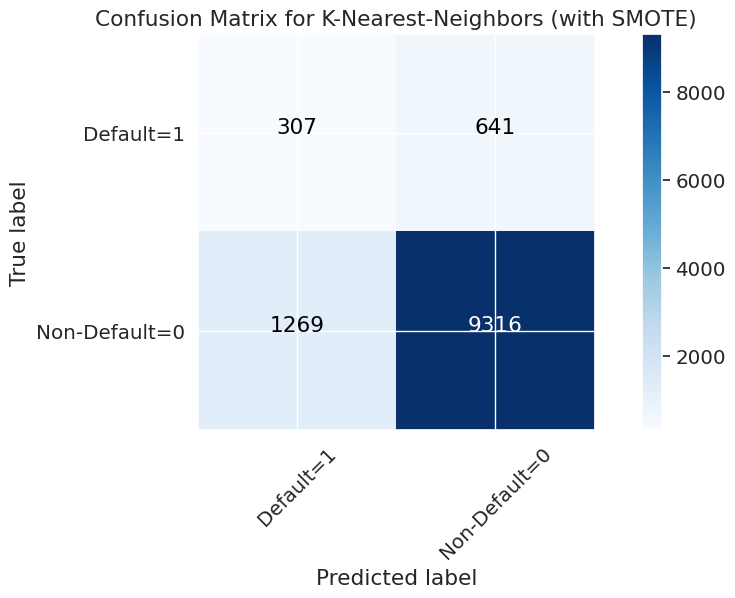

TP is: 307 FP is: 641 TN is: 9316 FN is: 1269

Model Evaluation:
{'k_neighbors': 2, 'val_acc': 0.8344, 'f1_Score': 0.8525, 'roc_auc': np.float64(0.6582)}



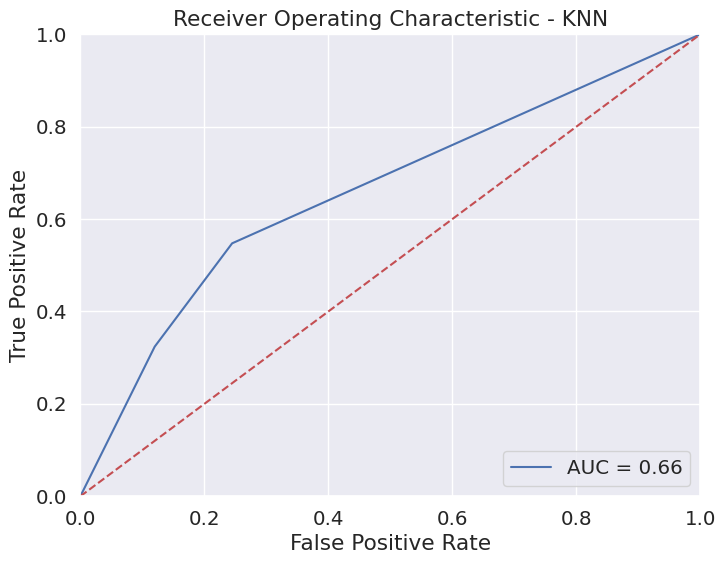


accuracy is: 0.83
recall is: 0.19
precision is: 0.32
f1 score is: 0.8525
roc auc is: 0.6582

üîπ Mejor F1 Score KNN: 0.8525


In [ ]:
# Ejecutar el mejor clasificador KNN
knn_classifier, f1_best_knn = best_knn_classifier(X_train_resampled, X_test, y_train_resampled, y_test)
print("üîπ Mejor F1 Score KNN:", f1_best_knn)


**An√°lisis KNN con SMOTE:**

El modelo mejor√≥ ligeramente con SMOTE: recall de 0.19 (vs 0.11 sin SMOTE) y mejor balance en las predicciones. El valor √≥ptimo de k=2 indica que el modelo funciona mejor con pocos vecinos cercanos. Sin embargo, el ROC AUC de 0.6582 es relativamente bajo, sugiriendo que KNN tiene dificultades inherentes con este dataset incluso despu√©s del balanceo. El modelo de √°rbol de decisi√≥n sigue siendo superior.

**Evaluaci√≥n de Overfitting/Underfitting:** Con k=2 (muy bajo), normalmente esperar√≠amos overfitting por sensibilidad al ruido. La ca√≠da notable en accuracy (0.83 vs 0.91 sin SMOTE) y el bajo ROC AUC (0.6582) sugieren **posible overfitting a los datos sint√©ticos de SMOTE** o que KNN simplemente no es adecuado para este problema. Un k tan bajo con 49,394 muestras de entrenamiento podr√≠a estar capturando patrones espurios de los datos sint√©ticos.


## Conclusiones

### Comparaci√≥n de resultados:

**√Årbol de Decisi√≥n:**
- F1-Score: 0.8699
- Accuracy: 0.86
- Recall: 0.25
- Precision: 0.35

**KNN:**
- F1-Score: 0.8525
- Accuracy: 0.83
- Recall: 0.19
- Precision: 0.32

### An√°lisis:

El √°rbol de decisi√≥n mostr√≥ un mejor rendimiento general comparado con KNN. Aunque ambos modelos tienen recall bajo para la clase minoritaria (pago completo), esto es esperado dado el fuerte desbalance original del dataset.

El uso de SMOTE mejor√≥ la capacidad de los modelos para detectar la clase minoritaria, pero a√∫n hay margen de mejora. Las m√©tricas m√°s importantes en este contexto ser√≠an recall y precision para la clase 1, ya que queremos identificar correctamente a los clientes que pagar√°n completo sus cuotas.


**F1-Score como m√©trica principal**: Usamos F1 porque balancea precision y recall, lo cual es importante cuando tenemos clases desbalanceadas.


Objetivo:
Target: La variable objetivo es si el cliente pag√≥ el M√çNIMO o la DEUDA TOTAL. Correlaci√≥n POSITIVA (+): Implica que la variable se asocia con el pago de la DEUDA TOTAL (mejor comportamiento). Correlaci√≥n NEGATIVA (-): Implica que la variable se asocia con el pago del M√çNIMO (comportamiento de mayor riesgo/uso de financiamiento)

In [ ]:
# Cargar el archivo
df = pd.read_csv("dataset_imputed_promediado.csv")

TARGET_COLUMN = 'target'
y = df[TARGET_COLUMN].astype(int) # Asegurar que es tipo entero (0 o 1)
X = df.drop(columns=[TARGET_COLUMN, 'Id'])

# Confirmaci√≥n de valores √∫nicos
print(f"Valores √∫nicos en la columna target: {y.unique()}")
print(f"N√∫mero de 0s: {y.value_counts().get(0, 0)}")
print(f"N√∫mero de 1s: {y.value_counts().get(1, 0)}")

# Preprocesamiento: Codificaci√≥n One-Hot para categ√≥ricas y Imputaci√≥n para num√©ricas
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Imputar valores faltantes (si los hay)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

In [ ]:
# Definir K
k = 10

# Configurar SelectKBest con f_classif (ANOVA F-value)
selector = SelectKBest(score_func=f_classif, k=k)

# Ajustar el selector a los datos
selector.fit(X, y)

# Obtener los nombres y puntajes de las 10 mejores caracter√≠sticas
best_feature_indices = selector.get_support(indices=True)
best_features = X.columns[best_feature_indices]
scores = selector.scores_[best_feature_indices]

feature_scores = pd.DataFrame({
    'Variable': best_features,
    'Puntaje F': scores
}).sort_values(by='Puntaje F', ascending=False).reset_index(drop=True)

print("\n‚úÖ Las 10 Variables M√°s Ricas para el Clasificador (K-Best):\n")
print(feature_scores)

# Subconjunto de datos para los modelos de ML
X_k_best = X[best_features]

In [ ]:
# Los DataFrames X_k_best y y deben estar disponibles del Paso 2

# Combinar las 10 mejores variables con el target en un solo DataFrame
df_k_best_final = pd.concat([X_k_best, y], axis=1)

# Calcular la correlaci√≥n de todas las columnas con la variable 'target'
# y ordenar el resultado
correlation_vector = df_k_best_final.corr()[TARGET_COLUMN].sort_values(ascending=False)

# Mostrar solo las correlaciones de las 10 variables, excluyendo 'target'
correlation_with_target = correlation_vector.drop(TARGET_COLUMN)

print("\n--- Resultado Final: Vector de Correlaci√≥n de Pearson con 'target' ---")
print("Muestra la fuerza y direcci√≥n lineal de la relaci√≥n:")
print(correlation_with_target.to_string())

3- REGRESI√ìN LOG√çSTICA




